In [957]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from cmcrameri import cm
# from statsmodels.formula.api import ols
from scipy.special import ndtr
from scipy.optimize import curve_fit, differential_evolution
# from scipy.stats import linregress, ttest_rel, spearmanr, shapiro, sem
# from pathlib import Path
from math import sqrt
# from math import log, e

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

--------------------------------------

This markdown performs the analysis of performance of short and long experiments done between the end of June and the beginning of july 2024.

# Defining color palette

In [958]:
import colorcet as cc

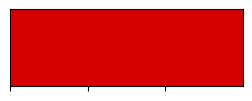

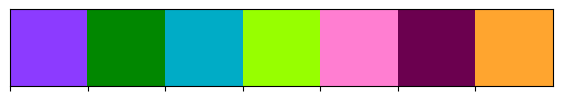

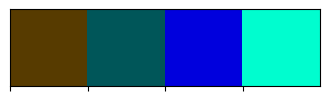

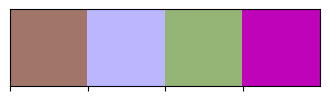

In [959]:
# Define names of all models
model_names = ['MLP', 'CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy', 'VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch', 'VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# Associate a color to each group of models:
# - MLP:
my_palette_MLP = sns.color_palette(cc.glasbey, len(model_names))[0]
# - CNNs:
my_palette_CNN = sns.color_palette(cc.glasbey, len(model_names))[1:8]
# - Scratch models:
my_palette_scratch = sns.color_palette(cc.glasbey, len(model_names))[8:12]
# - Pretrained models:
my_palette_pretrained = sns.color_palette(cc.glasbey, len(model_names))[12:16]

# Print all palettes separately:
sns.palplot(my_palette_MLP)
sns.palplot(my_palette_CNN)
sns.palplot(my_palette_scratch)
sns.palplot(my_palette_pretrained)

---------------------

# 2024-06-20: Short-exp 1

## Files Location

Folder: `results\data\2024-06-20_short-exp`
- **MLP data:** `MLP_exp_2024-06-20_11-02-41`
- **CNN data (small_1/2, large_1/2, medium_1/2, CNN_rudy(normal conv)):** `CNN_exp_2024-06-20_11-07-33`
- **VGG pretrained data:** `VGG_experiment_2024-06-20_11-33-50`
- **RESNET pretrained data:** `RESNET_exp-2024-06-20_14-17-51`
- **GOOGLENET pretrained data:** `GOOGLENET_exp_2024-06-20_14-26-59`
- **VIT pretrained data:** `VIT_exp_2024-06-20_14-33-03`

## Parameters

**testing_parameters:**
  clique_testing_levels: 100
  max_clique_size_proportion_test: 0.7
  num_test: 24
  test_iterations: 16

**training_parameters:**
  clique_training_levels: 10
  learning_rate: 0.001
  loss_function: BCELoss
  max_clique_size_proportion: 0.5
  min_clique_size_proportion: 0.3
  min_delta: 0.02
  num_train: 24
  num_training_cycles: 5
  num_training_steps: 100
  num_val: 24
  optimizer: AdamW
  patience: 4
  save_step: 5
  val_exit_loss: 0.1

## MLP model

### Metrics

In [960]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'MLP_exp_2024-06-20_11-02-41','MLP','MLP_N224_metrics.csv')
df_MLP_metrics = pd.read_csv(file_path)
df_MLP_metrics['model'] = 'MLP'
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,18810,1292,27424,10074,0.935728,0.651226,0.767975,0.854948,MLP


### Psychometric curve

In [961]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP fraction correct:
file_path = os.path.join('..','results', 'data', '2024-06-20_short-exp', 'MLP_exp_2024-06-20_11-02-41','MLP','MLP_N224_fraction_correct.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'
df_MLP

,clique size,fraction correct,model
0,156,0.97,MLP
1,154,0.96,MLP
2,152,0.98,MLP
3,151,0.99,MLP
4,149,0.98,MLP
...,...,...,...
95,7,0.48,MLP
96,5,0.51,MLP
97,4,0.51,MLP
98,2,0.55,MLP


In [962]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_MLP = []
for df in [df_MLP]:
    fitted_params_MLP.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_MLP)  

# put these into a dataframe:
df_fitted_params_MLP = pd.DataFrame(fitted_params_MLP, columns=['k0', 'delta'])
df_fitted_params_MLP['model'] = ['MLP']   
df_fitted_params_MLP

[array([58.46991579, 15.25473824])]


,k0,delta,model
0,58.469916,15.254738,MLP


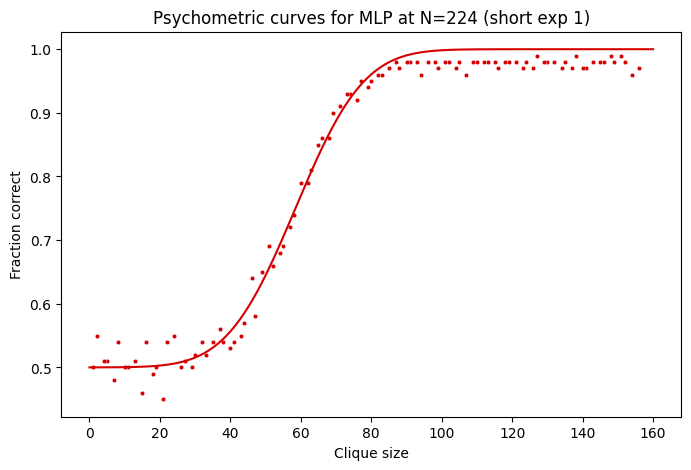

In [963]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
MLP_model_names = ['MLP']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_MLP, x='clique size', y='fraction correct', color=my_palette_MLP, ax=ax, s=10)

# defining y values using fitted parameters
y_vals = (1 + ndtr((x_vals - fitted_params_MLP[0][0]) / fitted_params_MLP[0][1])) / 2
ax.plot(x_vals, y_vals, color=my_palette_MLP)

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for MLP at N=224 (short exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-20_short-exp', 'MLP_fc_over_n_shortexp_1'), dpi=300)

# Show the plot
plt.show()

In [964]:
# adding K0 to metrics dataframe:
df_MLP_metrics['K0'] = fitted_params_MLP[0][0]
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,18810,1292,27424,10074,0.935728,0.651226,0.767975,0.854948,MLP,58.469916


## CNN models comparison

### Metrics

In [965]:
# MODEL NAMES:
model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2']  

# CNN_small_1 metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_small_1','CNN_small_1_N224_metrics.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_small_2','CNN_small_2_N224_metrics.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_medium_1','CNN_medium_1_N224_metrics.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_medium_2','CNN_medium_2_N224_metrics.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_large_1','CNN_large_1_N224_metrics.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_large_2','CNN_large_2_N224_metrics.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN_rudy metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_rudy','CNN_rudy_N224_metrics.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs_metrics = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy])
df_CNNs_metrics


,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,17140,0,28872,11588,1.000000,0.596630,0.747362,0.884993,CNN_small_1
0,28852,28748,0,0,0.500903,1.000000,0.667469,0.762972,CNN_small_2
0,11909,0,28681,17010,1.000000,0.411805,0.583374,0.893155,CNN_medium_1
0,28928,28672,0,0,0.502222,1.000000,0.668639,0.500000,CNN_medium_2
0,12374,0,28831,16395,1.000000,0.430116,0.601512,0.899071,CNN_large_1
0,28845,28755,0,0,0.500781,1.000000,0.667361,0.500000,CNN_large_2
0,28654,28946,0,0,0.497465,1.000000,0.664410,0.500000,CNN_rudy


### Psychometric curves

In [966]:
# CNN_small_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_small_1','CNN_small_1_N224_fraction_correct.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_small_2','CNN_small_2_N224_fraction_correct.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_medium_1','CNN_medium_1_N224_fraction_correct.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_medium_2','CNN_medium_2_N224_fraction_correct.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_large_1','CNN_large_1_N224_fraction_correct.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_large_2','CNN_large_2_N224_fraction_correct.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN rudy fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp', 'CNN_exp_2024-06-20_11-07-33','CNN_rudy','CNN_rudy_N224_fraction_correct.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy], ignore_index=True)
df_CNNs

,clique size,fraction correct,model
0,156,1.00,CNN_small_1
1,154,1.00,CNN_small_1
2,152,1.00,CNN_small_1
3,151,1.00,CNN_small_1
4,149,1.00,CNN_small_1
...,...,...,...
695,7,0.49,CNN_rudy
696,5,0.48,CNN_rudy
697,4,0.52,CNN_rudy
698,2,0.45,CNN_rudy


In [967]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_CNNs = []
for df in [df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy]:
    fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_CNNs)  

# put these into a dataframe:
df_fitted_params_CNNs = pd.DataFrame(fitted_params_CNNs, columns=['k0', 'delta'])
df_fitted_params_CNNs['model'] = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']   
df_fitted_params_CNNs

[array([63.00921503,  4.36971532]), array([269.39584464,  58.17468618]), array([91.68664732,  2.31005297]), array([4.54128507e+08, 1.76303722e+08]), array([88.94408225,  2.88688642]), array([84485651.4355091 , 29020469.58037882]), array([555.16708311,  47.45319413])]


C:\Users\danie\AppData\Local\Temp\ipykernel_23184\3160746336.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])


,k0,delta,model
0,6.300922e+01,4.369715e+00,CNN_small_1
1,2.693958e+02,5.817469e+01,CNN_small_2
2,9.168665e+01,2.310053e+00,CNN_medium_1
3,4.541285e+08,1.763037e+08,CNN_medium_2
4,8.894408e+01,2.886886e+00,CNN_large_1
5,8.448565e+07,2.902047e+07,CNN_large_2
6,5.551671e+02,4.745319e+01,CNN_rudy


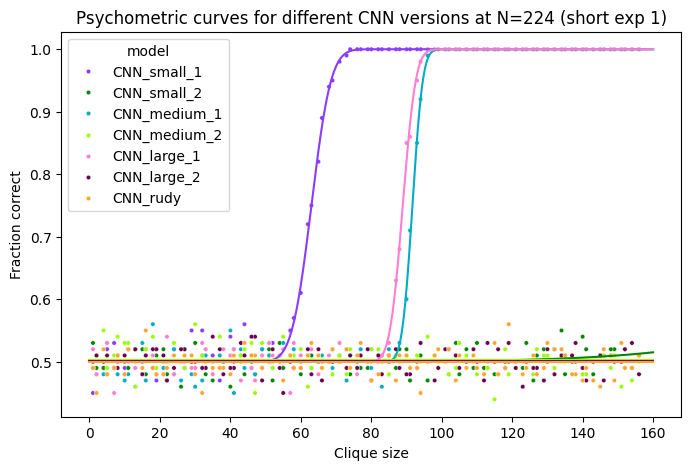

In [968]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
CNNs_model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot for each model:
sns.scatterplot(data=df_CNNs, x='clique size', y='fraction correct', hue='model', palette=my_palette_CNN, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(CNNs_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_CNNs[index][0]) / fitted_params_CNNs[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_CNN[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different CNN versions at N=224 (short exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-20_short-exp', 'CNN_versions_fc_over_n_shortexp_1'), dpi=300)

# Show the plot
plt.show()

In [969]:
# adding K0 to metrics dataframe:
df_CNNs_metrics['K0'] = [fitted_params_CNNs[0][0], fitted_params_CNNs[1][0], fitted_params_CNNs[2][0], fitted_params_CNNs[3][0], fitted_params_CNNs[4][0], fitted_params_CNNs[5][0], fitted_params_CNNs[6][0]]
df_CNNs_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,17140,0,28872,11588,1.000000,0.596630,0.747362,0.884993,CNN_small_1,6.300922e+01
0,28852,28748,0,0,0.500903,1.000000,0.667469,0.762972,CNN_small_2,2.693958e+02
0,11909,0,28681,17010,1.000000,0.411805,0.583374,0.893155,CNN_medium_1,9.168665e+01
0,28928,28672,0,0,0.502222,1.000000,0.668639,0.500000,CNN_medium_2,4.541285e+08
0,12374,0,28831,16395,1.000000,0.430116,0.601512,0.899071,CNN_large_1,8.894408e+01
0,28845,28755,0,0,0.500781,1.000000,0.667361,0.500000,CNN_large_2,8.448565e+07
0,28654,28946,0,0,0.497465,1.000000,0.664410,0.500000,CNN_rudy,5.551671e+02


## Pretrained models comparison

### Metrics

In [970]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp','VGG_experiment_2024-06-20_11-33-50','VGG16pretrained','VGG16pretrained_N224_metrics.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-06-20_short-exp','RESNET_exp_2024-06-20_14-17-51','ResNet50pretrained','ResNet50pretrained_N224_metrics.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-06-20_short-exp','GoogleNet_exp_2024-06-20_14-26-59','GoogleNetpretrained','GoogleNetpretrained_N224_metrics.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-06-20_short-exp','VIT_exp_2024-06-20_14-33-03','VITpretrained','VITpretrained_N224_metrics.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_metrics = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained])
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,18919,280,28401,10000,0.985416,0.654207,0.786359,0.867596,VGGpretrained
0,19433,1080,27525,9562,0.947350,0.670219,0.785045,0.855804,ResNetpretrained
0,19019,773,27906,9902,0.960944,0.657619,0.780859,0.859599,GoogleNetpretrained
0,18949,274,28623,9754,0.985746,0.660175,0.790761,0.871677,ViTpretrained


### Psychometric curves

In [971]:
# VGG fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-20_short-exp','VGG_experiment_2024-06-20_11-33-50','VGG16pretrained','VGG16pretrained_N224_fraction_correct.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet fraction correct:
file_path = os.path.join('..','results','data','2024-06-20_short-exp','RESNET_exp_2024-06-20_14-17-51','ResNet50pretrained','ResNet50pretrained_N224_fraction_correct.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet fraction correct:
file_path = os.path.join('..','results','data','2024-06-20_short-exp','GoogleNet_exp_2024-06-20_14-26-59','GoogleNetpretrained','GoogleNetpretrained_N224_fraction_correct.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT fraction correct:
file_path = os.path.join('..','results','data','2024-06-20_short-exp','VIT_exp_2024-06-20_14-33-03','VITpretrained','VITpretrained_N224_fraction_correct.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_fraction_correct = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained], ignore_index=True)
df_pretrained_fraction_correct

,clique size,fraction correct,model
0,156,0.99,VGGpretrained
1,154,0.99,VGGpretrained
2,152,0.99,VGGpretrained
3,151,1.00,VGGpretrained
4,149,0.99,VGGpretrained
...,...,...,...
395,7,0.51,ViTpretrained
396,5,0.49,ViTpretrained
397,4,0.51,ViTpretrained
398,2,0.51,ViTpretrained


In [972]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_pretrained_models = []
for df in [df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained]:
    fitted_params_pretrained_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_pretrained_models)  

# put these into a dataframe:
df_fitted_params_pretrained_models = pd.DataFrame(fitted_params_pretrained_models, columns=['k0', 'delta'])
df_fitted_params_pretrained_models['model'] = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']   
df_fitted_params_pretrained_models

[array([54.59193706,  8.37861288]), array([54.33449161, 11.05620322]), array([54.25977681,  9.77796173]), array([54.15199859,  8.9715422 ])]


,k0,delta,model
0,54.591937,8.378613,VGGpretrained
1,54.334492,11.056203,ResNetpretrained
2,54.259777,9.777962,GoogleNetpretrained
3,54.151999,8.971542,ViTpretrained


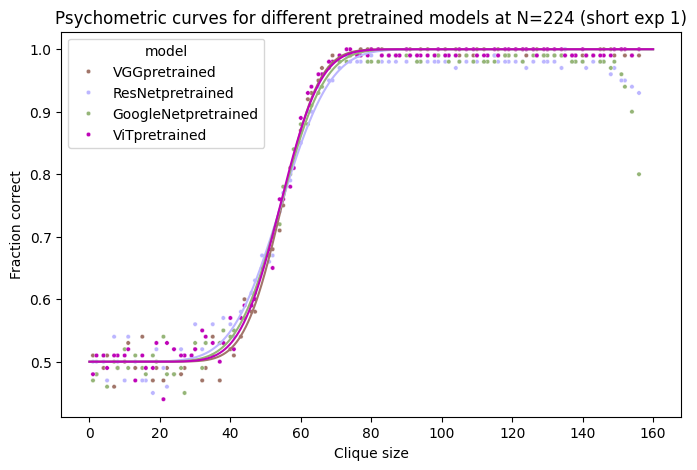

In [973]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
pretrained_model_names = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_pretrained_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_pretrained, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(pretrained_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_pretrained_models[index][0]) / fitted_params_pretrained_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_pretrained[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different pretrained models at N=224 (short exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-20_short-exp', 'pretrained_models_fc_over_n_shortexp_1'), dpi=300)

# Show the plot
plt.show()

In [974]:
# adding K0 to metrics dataframe:
df_pretrained_metrics['K0'] = [fitted_params_pretrained_models[0][0], fitted_params_pretrained_models[1][0], fitted_params_pretrained_models[2][0], fitted_params_pretrained_models[3][0]]
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,18919,280,28401,10000,0.985416,0.654207,0.786359,0.867596,VGGpretrained,54.591937
0,19433,1080,27525,9562,0.947350,0.670219,0.785045,0.855804,ResNetpretrained,54.334492
0,19019,773,27906,9902,0.960944,0.657619,0.780859,0.859599,GoogleNetpretrained,54.259777
0,18949,274,28623,9754,0.985746,0.660175,0.790761,0.871677,ViTpretrained,54.151999


## Comparing MLP with best CNN model and pretrained models

### Metrics

In [975]:
# merging all metrics dataframes:
df_all_metrics_shortexp_1 = pd.concat([df_MLP_metrics, df_CNNs_metrics, df_pretrained_metrics], ignore_index=True)
df_all_metrics_shortexp_1
# write K0 column in decimal notation:
df_all_metrics_shortexp_1['K0'] = df_all_metrics_shortexp_1['K0'].apply(lambda x: '{:.2f}'.format(x))
# rounding all values to 2 decimal places:
df_all_metrics_shortexp_1 = df_all_metrics_shortexp_1.round(2)
df_all_metrics_shortexp_1
# putting "model" variable in first place:
cols = ['model'] + [col for col in df_all_metrics_shortexp_1.columns if col != 'model']
df_all_metrics_shortexp_1 = df_all_metrics_shortexp_1[cols]
df_all_metrics_shortexp_1

,model,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,K0
0,MLP,18810,1292,27424,10074,0.94,0.65,0.77,0.85,58.47
1,CNN_small_1,17140,0,28872,11588,1.00,0.60,0.75,0.88,63.01
2,CNN_small_2,28852,28748,0,0,0.50,1.00,0.67,0.76,269.40
3,CNN_medium_1,11909,0,28681,17010,1.00,0.41,0.58,0.89,91.69
4,CNN_medium_2,28928,28672,0,0,0.50,1.00,0.67,0.50,454128506.55
5,CNN_large_1,12374,0,28831,16395,1.00,0.43,0.60,0.90,88.94
6,CNN_large_2,28845,28755,0,0,0.50,1.00,0.67,0.50,84485651.44
7,CNN_rudy,28654,28946,0,0,0.50,1.00,0.66,0.50,555.17
8,VGGpretrained,18919,280,28401,10000,0.99,0.65,0.79,0.87,54.59
9,ResNetpretrained,19433,1080,27525,9562,0.95,0.67,0.79,0.86,54.33


### Psychometric curves

In [976]:
# merging dataframes for comparison:
df_comparison_shortexp_1 = pd.concat([df_MLP, df_CNN_small_1, df_CNN_medium_1, df_CNN_large_1, df_pretrained_fraction_correct])
df_comparison_shortexp_1
# merging fitted parameters for comparison:
fitted_params_CNNs[0]   # best CNN models are CNN_small_1, CNN_medium_1 and CNN_large_1:
fitted_params_comparison_shortexp_1 = [fitted_params_MLP[0], fitted_params_CNNs[0], fitted_params_CNNs[2], fitted_params_CNNs[4], fitted_params_pretrained_models[0], fitted_params_pretrained_models[1], fitted_params_pretrained_models[2], fitted_params_pretrained_models[3]]
fitted_params_comparison_shortexp_1

[array([58.46991579, 15.25473824]),
 array([63.00921503,  4.36971532]),
 array([91.68664732,  2.31005297]),
 array([88.94408225,  2.88688642]),
 array([54.59193706,  8.37861288]),
 array([54.33449161, 11.05620322]),
 array([54.25977681,  9.77796173]),
 array([54.15199859,  8.9715422 ])]

[(0.8392156862745098, 0.0, 0.0), (0.5490196078431373, 0.23137254901960785, 1.0), (0.0, 0.6745098039215687, 0.7764705882352941), (1.0, 0.49411764705882355, 0.8196078431372549), (0.6313725490196078, 0.4588235294117647, 0.4117647058823529), (0.7372549019607844, 0.7137254901960784, 1.0), (0.5843137254901961, 0.7098039215686275, 0.4666666666666667), (0.7490196078431373, 0.011764705882352941, 0.7215686274509804)]


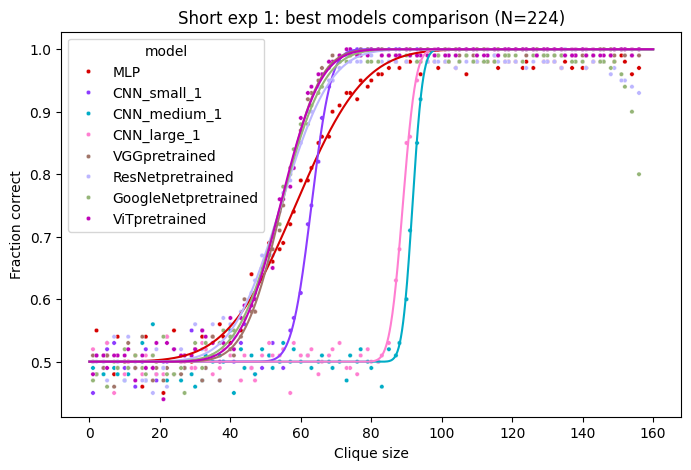

In [977]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['MLP', 'CNN_small_1', 'CNN_medium_1', 'CNN_large_1', 'VGGpretrained', 'ResNetpretrained', 'GoogLeNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# creating palette for the graph(concatenating the needed palettes):
my_palette_comparison = [my_palette_MLP, my_palette_CNN[0], my_palette_CNN[2], my_palette_CNN[4], my_palette_pretrained[0], my_palette_pretrained[1], my_palette_pretrained[2], my_palette_pretrained[3]]
print(my_palette_comparison)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_comparison_shortexp_1, x='clique size', y='fraction correct', hue='model', palette=my_palette_comparison, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_comparison_shortexp_1[index][0]) / fitted_params_comparison_shortexp_1[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_comparison[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Short exp 1: best models comparison (N=224)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-20_short-exp', 'comparison_fc_over_n_shortexp_1'), dpi=300)

# Show the plot
plt.show()

In [978]:
# creating a dataframe with all fitted parameters for short experiment:
df_fitted_params_shortexp_1 = pd.concat([df_fitted_params_MLP, df_fitted_params_CNNs, df_fitted_params_pretrained_models])
df_fitted_params_shortexp_1
# adding experiment type variable to the dataframe:
df_fitted_params_shortexp_1['experiment'] = ['short1', 'short1', 'short1', 'short1', 'short1', 'short1', 'short1', 'short1', 'short1', 'short1', 'short1', 'short1']
df_fitted_params_shortexp_1

,k0,delta,model,experiment
0,5.846992e+01,1.525474e+01,MLP,short1
0,6.300922e+01,4.369715e+00,CNN_small_1,short1
1,2.693958e+02,5.817469e+01,CNN_small_2,short1
2,9.168665e+01,2.310053e+00,CNN_medium_1,short1
3,4.541285e+08,1.763037e+08,CNN_medium_2,short1
4,8.894408e+01,2.886886e+00,CNN_large_1,short1
5,8.448565e+07,2.902047e+07,CNN_large_2,short1
6,5.551671e+02,4.745319e+01,CNN_rudy,short1
0,5.459194e+01,8.378613e+00,VGGpretrained,short1
1,5.433449e+01,1.105620e+01,ResNetpretrained,short1


# 2024-06-26: Long-exp 1

## Files Location

Folder: `results\data\2024-06-26_long-exp`
- **MLP data:** `\MLP`
- **CNN data (small_1/2, large_1/2, medium_1/2, CNN_rudy(normal conv)):** ``\CNN_...`
- **VGG data (scratch + pretrained):** `\VGG16pretrained` \ `\VGG16scratch`
- **RESNET (scratch + pretrained):** `\ResNet50pretrained` \ `\ResNet50scratch`
- **GOOGLENET (scratch + pretrained):** ``
- **VIT (scratch + pretrained):** ``

## Parameters

NOTE: differences with "short-exp" are in bold

**training_parameters:**
  num_training_steps: 100
  **num_training_cycles: 10**
  **num_train: 36**
  **num_val: 36**
  **learning_rate: 0.01**
  max_clique_size_proportion: 0.5
  min_clique_size_proportion: 0.3
  clique_training_levels: 10
  save_step: 5
  optimizer: AdamW
  loss_function: BCELoss
  **patience: 10**
  min_delta: 0.02
  val_exit_loss: 0.1

**testing_parameters:**
  max_clique_size_proportion_test: 0.7
  **num_test: 36** 
  clique_testing_levels: 100
  test_iterations: 16

Also the CNN models have **l1=100 in the longer exp**, while **l1=135 in the shorter exp**


## MLP model

### Metrics

In [979]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','MLP','MLP_N224_metrics.csv')
df_MLP_metrics = pd.read_csv(file_path)
df_MLP_metrics['model'] = 'MLP'
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,19821,825,27874,9080,0.960041,0.685824,0.800089,0.873049,MLP


### Psychometric curve

In [980]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','MLP','MLP_N224_fraction_correct.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'
df_MLP

,clique size,fraction correct,model
0,156,0.98,MLP
1,154,0.99,MLP
2,152,0.99,MLP
3,151,0.98,MLP
4,149,0.98,MLP
...,...,...,...
95,7,0.54,MLP
96,5,0.49,MLP
97,4,0.52,MLP
98,2,0.49,MLP


In [981]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_MLP = []
for df in [df_MLP]:
    fitted_params_MLP.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_MLP)  

# put these into a dataframe:
df_fitted_params_MLP = pd.DataFrame(fitted_params_MLP, columns=['k0', 'delta'])
df_fitted_params_MLP['model'] = ['MLP']   
df_fitted_params_MLP

[array([51.55617171, 10.75998479])]


,k0,delta,model
0,51.556172,10.759985,MLP


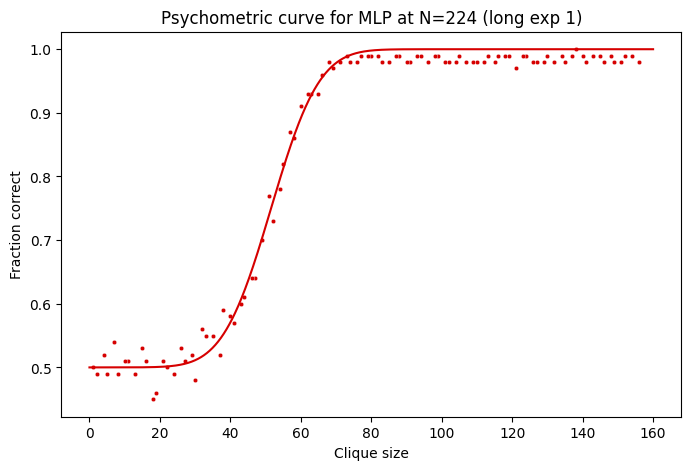

In [982]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
MLP_model_names = ['MLP']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_MLP, x='clique size', y='fraction correct', color=my_palette_MLP, ax=ax, s=10)

# defining y values using fitted parameters
y_vals = (1 + ndtr((x_vals - fitted_params_MLP[0][0]) / fitted_params_MLP[0][1])) / 2
ax.plot(x_vals, y_vals, color=my_palette_MLP)

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curve for MLP at N=224 (long exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-26_long-exp', 'MLP_fc_over_n_longexp_1'), dpi=300)

# Show the plot
plt.show()

In [983]:
# adding K0 to metrics dataframe:
df_MLP_metrics['K0'] = fitted_params_MLP[0][0]
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,19821,825,27874,9080,0.960041,0.685824,0.800089,0.873049,MLP,51.556172


## CNN models comparison

In [984]:
# MODEL NAMES:
model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2']  

# CNN_small_1 metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_small_1','CNN_small_1_N224_metrics.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_small_2','CNN_small_2_N224_metrics.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_medium_1','CNN_medium_1_N224_metrics.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_medium_2','CNN_medium_2_N224_metrics.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_large_1','CNN_large_1_N224_metrics.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_large_2','CNN_large_2_N224_metrics.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN_rudy metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp', 'CNN_rudy','CNN_rudy_N224_metrics.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs_metrics = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy])
df_CNNs_metrics


,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,0,0,28948,28652,0.000000,0.000000,0.000000,0.500000,CNN_small_1
0,0,0,28896,28704,0.000000,0.000000,0.000000,0.264671,CNN_small_2
0,23082,4110,24704,5704,0.848853,0.801848,0.824681,0.893028,CNN_medium_1
0,0,0,28732,28868,0.000000,0.000000,0.000000,0.395930,CNN_medium_2
0,16745,0,28625,12230,1.000000,0.577912,0.732502,0.899869,CNN_large_1
0,0,0,28796,28804,0.000000,0.000000,0.000000,0.725189,CNN_large_2
0,28909,28691,0,0,0.501892,1.000000,0.668347,0.500000,CNN_rudy


### Psychometric curves

In [985]:
# CNN_small_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_small_1','CNN_small_1_N224_fraction_correct.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_small_2','CNN_small_2_N224_fraction_correct.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_medium_1','CNN_medium_1_N224_fraction_correct.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_medium_2','CNN_medium_2_N224_fraction_correct.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_large_1','CNN_large_1_N224_fraction_correct.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_large_2','CNN_large_2_N224_fraction_correct.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN rudy fraction correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','CNN_rudy','CNN_rudy_N224_fraction_correct.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy], ignore_index=True)
df_CNNs

,clique size,fraction correct,model
0,156,0.45,CNN_small_1
1,154,0.51,CNN_small_1
2,152,0.48,CNN_small_1
3,151,0.51,CNN_small_1
4,149,0.48,CNN_small_1
...,...,...,...
695,7,0.49,CNN_rudy
696,5,0.50,CNN_rudy
697,4,0.50,CNN_rudy
698,2,0.47,CNN_rudy


In [986]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_CNNs = []
for df in [df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy]:
    fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_CNNs)  

# put these into a dataframe:
df_fitted_params_CNNs = pd.DataFrame(fitted_params_CNNs, columns=['k0', 'delta'])
df_fitted_params_CNNs['model'] = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']   
df_fitted_params_CNNs

[array([8.63992801e+08, 3.35423087e+08]), array([182.85214015,  15.2686215 ]), array([38.92552027, 13.32826441]), array([243.91754068,  41.09342351]), array([66.69711796,  4.20383307]), array([2375917.45211331,  782633.41892585]), array([246.92601949,  47.38802261])]


,k0,delta,model
0,8.639928e+08,3.354231e+08,CNN_small_1
1,1.828521e+02,1.526862e+01,CNN_small_2
2,3.892552e+01,1.332826e+01,CNN_medium_1
3,2.439175e+02,4.109342e+01,CNN_medium_2
4,6.669712e+01,4.203833e+00,CNN_large_1
5,2.375917e+06,7.826334e+05,CNN_large_2
6,2.469260e+02,4.738802e+01,CNN_rudy


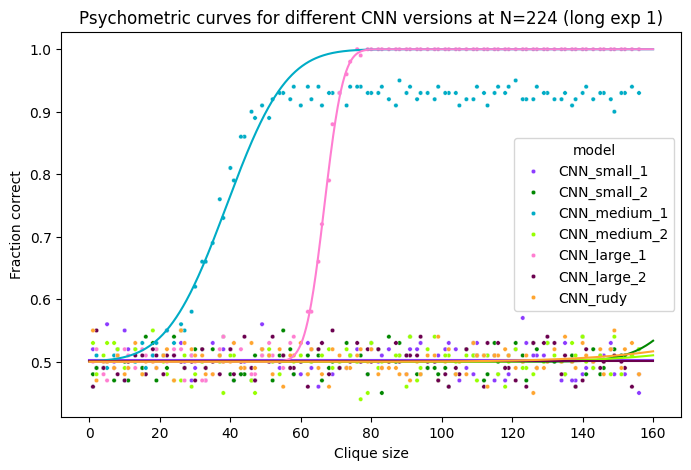

In [987]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
CNNs_model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_CNNs, x='clique size', y='fraction correct', hue='model', palette=my_palette_CNN, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(CNNs_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_CNNs[index][0]) / fitted_params_CNNs[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_CNN[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different CNN versions at N=224 (long exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-26_long-exp', 'CNN_versions_fc_over_n_longexp_1'), dpi=300)

# Show the plot
plt.show()

In [988]:
# adding K0 to metrics dataframe:
df_CNNs_metrics['K0'] = [fitted_params_CNNs[0][0], fitted_params_CNNs[1][0], fitted_params_CNNs[2][0], fitted_params_CNNs[3][0], fitted_params_CNNs[4][0], fitted_params_CNNs[5][0], fitted_params_CNNs[6][0]]
df_CNNs_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,0,0,28948,28652,0.000000,0.000000,0.000000,0.500000,CNN_small_1,8.639928e+08
0,0,0,28896,28704,0.000000,0.000000,0.000000,0.264671,CNN_small_2,1.828521e+02
0,23082,4110,24704,5704,0.848853,0.801848,0.824681,0.893028,CNN_medium_1,3.892552e+01
0,0,0,28732,28868,0.000000,0.000000,0.000000,0.395930,CNN_medium_2,2.439175e+02
0,16745,0,28625,12230,1.000000,0.577912,0.732502,0.899869,CNN_large_1,6.669712e+01
0,0,0,28796,28804,0.000000,0.000000,0.000000,0.725189,CNN_large_2,2.375917e+06
0,28909,28691,0,0,0.501892,1.000000,0.668347,0.500000,CNN_rudy,2.469260e+02


## Scratch models comparison

### Metrics

In [989]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','VGG16scratch','VGG16scratch_N224_metrics.csv')
df_VGGscratch = pd.read_csv(file_path)
df_VGGscratch['model'] = 'VGGscratch'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','ResNet50scratch','ResNet50scratch_N224_metrics.csv')
df_RESNETscratch = pd.read_csv(file_path)
df_RESNETscratch['model'] = 'ResNetscratch'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','GoogleNetscratch','GoogleNetscratch_N224_metrics.csv')
df_GOOGLENETscratch = pd.read_csv(file_path)
df_GOOGLENETscratch['model'] = 'GoogleNetscratch'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','VITscratch','VITscratch_N224_metrics.csv')
df_VITscratch = pd.read_csv(file_path)
df_VITscratch['model'] = 'ViTscratch'

# concatenating all dataframes:
df_scratch_metrics = pd.concat([df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch])
df_scratch_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,28920,28680,0,0,0.502083,1.000000,0.668516,0.500000,VGGscratch
0,17703,0,29025,10872,1.000000,0.619528,0.765072,0.898058,ResNetscratch
0,19145,4,28948,9503,0.999791,0.668284,0.801096,0.887781,GoogleNetscratch
0,0,0,28698,28902,0.000000,0.000000,0.000000,0.500069,ViTscratch


### Psychometric curves

In [990]:
# VGG fraction_correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','VGG16scratch','VGG16scratch_N224_fraction_correct.csv')
df_VGGscratch = pd.read_csv(file_path)
df_VGGscratch['model'] = 'VGGscratch'
# ResNet fraction_correct:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','ResNet50scratch','ResNet50scratch_N224_fraction_correct.csv')
df_RESNETscratch = pd.read_csv(file_path)
df_RESNETscratch['model'] = 'ResNetscratch'
# GoogleNet fraction_correct:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','GoogleNetscratch','GoogleNetscratch_N224_fraction_correct.csv')
df_GOOGLENETscratch = pd.read_csv(file_path)
df_GOOGLENETscratch['model'] = 'GoogleNetscratch'
# ViT fraction_correct:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','VITscratch','VITscratch_N224_fraction_correct.csv')
df_VITscratch = pd.read_csv(file_path)
df_VITscratch['model'] = 'ViTscratch'

# concatenating all dataframes:
df_scratch_fraction_correct = pd.concat([df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch])
df_scratch_fraction_correct

,clique size,fraction correct,model
0,156,0.51,VGGscratch
1,154,0.47,VGGscratch
2,152,0.50,VGGscratch
3,151,0.51,VGGscratch
4,149,0.51,VGGscratch
...,...,...,...
95,7,0.45,ViTscratch
96,5,0.47,ViTscratch
97,4,0.52,ViTscratch
98,2,0.48,ViTscratch


In [991]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_scratch_models = []
for df in [df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch]:
    fitted_params_scratch_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_scratch_models)  

# put these into a dataframe:
df_fitted_params_scratch_models = pd.DataFrame(fitted_params_scratch_models, columns=['k0', 'delta'])
df_fitted_params_scratch_models['model'] = ['VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch']   
df_fitted_params_scratch_models

[array([43824832.00331447, 16417806.62506641]), array([58.71567199,  4.05517418]), array([51.62481994,  6.54678921]), array([2559.0539875 ,  330.79495339])]


,k0,delta,model
0,4.382483e+07,1.641781e+07,VGGscratch
1,5.871567e+01,4.055174e+00,ResNetscratch
2,5.162482e+01,6.546789e+00,GoogleNetscratch
3,2.559054e+03,3.307950e+02,ViTscratch


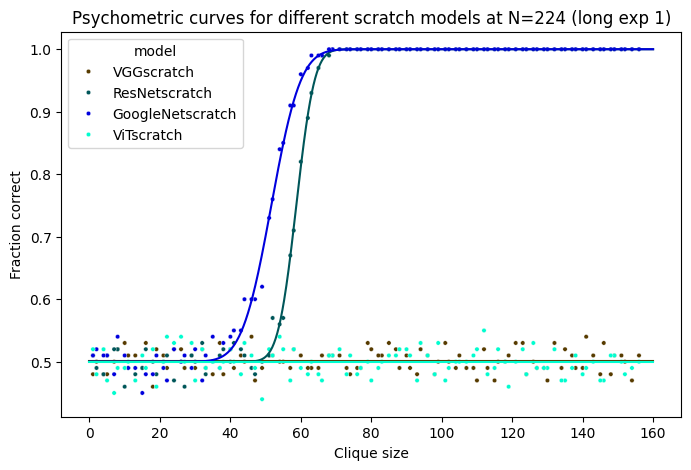

In [992]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
scratch_model_names = ['VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_scratch_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_scratch, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(scratch_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_scratch_models[index][0]) / fitted_params_scratch_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_scratch[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different scratch models at N=224 (long exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-26_long-exp', 'scratch_models_fc_over_n_longexp_1'), dpi=300)

# Show the plot
plt.show()

In [993]:
# adding K0 to metrics dataframe:
df_scratch_metrics['K0'] = [fitted_params_scratch_models[0][0], fitted_params_scratch_models[1][0], fitted_params_scratch_models[2][0], fitted_params_scratch_models[3][0]]
df_scratch_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,28920,28680,0,0,0.502083,1.000000,0.668516,0.500000,VGGscratch,4.382483e+07
0,17703,0,29025,10872,1.000000,0.619528,0.765072,0.898058,ResNetscratch,5.871567e+01
0,19145,4,28948,9503,0.999791,0.668284,0.801096,0.887781,GoogleNetscratch,5.162482e+01
0,0,0,28698,28902,0.000000,0.000000,0.000000,0.500069,ViTscratch,2.559054e+03


## Pretrained models comparison

### Metrics

In [994]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','VGG16pretrained','VGG16pretrained_N224_metrics.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','ResNet50pretrained','ResNet50pretrained_N224_metrics.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','GoogleNetpretrained','GoogleNetpretrained_N224_metrics.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','VITpretrained','VITpretrained_N224_metrics.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_metrics = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained])
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,19521,453,28395,9231,0.977321,0.678944,0.801256,0.872757,VGGpretrained
0,18565,373,28493,10169,0.980304,0.646099,0.778864,0.862523,ResNetpretrained
0,18897,734,28074,9895,0.962610,0.656328,0.780497,0.863568,GoogleNetpretrained
0,19079,93,28832,9596,0.995149,0.665353,0.797500,0.881140,ViTpretrained


### Psychometric curves

In [995]:
# VGG fraction_correct:
file_path = os.path.join('..','results', 'data','2024-06-26_long-exp','VGG16pretrained','VGG16pretrained_N224_fraction_correct.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet fraction_correct:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','ResNet50pretrained','ResNet50pretrained_N224_fraction_correct.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet fraction_correct:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','GoogleNetpretrained','GoogleNetpretrained_N224_fraction_correct.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT fraction_correct:
file_path = os.path.join('..','results','data','2024-06-26_long-exp','VITpretrained','VITpretrained_N224_fraction_correct.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_fraction_correct = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained])
df_pretrained_fraction_correct

,clique size,fraction correct,model
0,156,0.99,VGGpretrained
1,154,0.99,VGGpretrained
2,152,0.99,VGGpretrained
3,151,0.99,VGGpretrained
4,149,0.99,VGGpretrained
...,...,...,...
95,7,0.51,ViTpretrained
96,5,0.51,ViTpretrained
97,4,0.50,ViTpretrained
98,2,0.52,ViTpretrained


In [996]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_pretrained_models = []
for df in [df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained]:
    fitted_params_pretrained_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_pretrained_models)  

# put these into a dataframe:
df_fitted_params_pretrained_models = pd.DataFrame(fitted_params_pretrained_models, columns=['k0', 'delta'])
df_fitted_params_pretrained_models['model'] = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']   
df_fitted_params_pretrained_models

[array([50.98862315,  9.01842298]), array([56.11959146,  9.3144786 ]), array([52.87844231,  9.49640189]), array([52.6099311 ,  6.75388066])]


,k0,delta,model
0,50.988623,9.018423,VGGpretrained
1,56.119591,9.314479,ResNetpretrained
2,52.878442,9.496402,GoogleNetpretrained
3,52.609931,6.753881,ViTpretrained


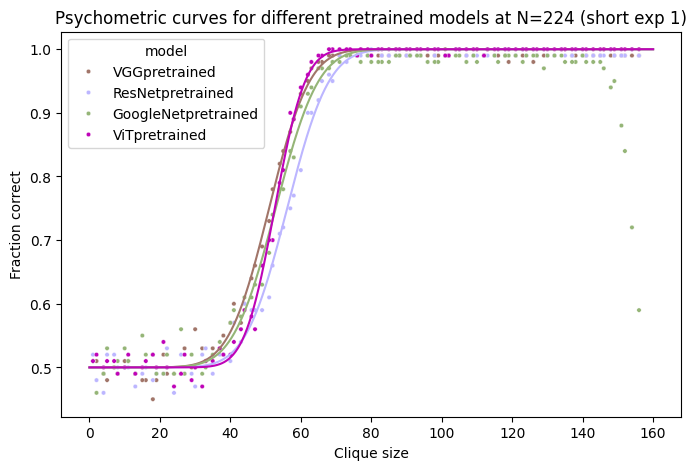

In [997]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
pretrained_model_names = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_pretrained_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_pretrained, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(pretrained_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_pretrained_models[index][0]) / fitted_params_pretrained_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_pretrained[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different pretrained models at N=224 (short exp 1)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-26_long-exp', 'pretrained_models_fc_over_n_longexp_1'), dpi=300)

# Show the plot
plt.show()

In [998]:
# adding K0 to metrics dataframe:
df_pretrained_metrics['K0'] = [fitted_params_pretrained_models[0][0], fitted_params_pretrained_models[1][0], fitted_params_pretrained_models[2][0], fitted_params_pretrained_models[3][0]]
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,19521,453,28395,9231,0.977321,0.678944,0.801256,0.872757,VGGpretrained,50.988623
0,18565,373,28493,10169,0.980304,0.646099,0.778864,0.862523,ResNetpretrained,56.119591
0,18897,734,28074,9895,0.962610,0.656328,0.780497,0.863568,GoogleNetpretrained,52.878442
0,19079,93,28832,9596,0.995149,0.665353,0.797500,0.881140,ViTpretrained,52.609931


## Comparing MLP with best CNN, scratch and pretrained models

### Metrics

In [999]:
# merging all metrics dataframes:
df_all_metrics_longexp_1 = pd.concat([df_MLP_metrics, df_CNNs_metrics, df_scratch_metrics, df_pretrained_metrics], ignore_index=True)
df_all_metrics_longexp_1
# write K0 column in decimal notation:
df_all_metrics_longexp_1['K0'] = df_all_metrics_longexp_1['K0'].apply(lambda x: '{:.2f}'.format(x))
# rounding all values to 2 decimal places:
df_all_metrics_longexp_1 = df_all_metrics_longexp_1.round(2)
df_all_metrics_longexp_1
# putting "model" variable in first place:
cols = ['model'] + [col for col in df_all_metrics_longexp_1.columns if col != 'model']
df_all_metrics_longexp_1 = df_all_metrics_longexp_1[cols]
df_all_metrics_longexp_1

,model,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,K0
0,MLP,19821,825,27874,9080,0.96,0.69,0.80,0.87,51.56
1,CNN_small_1,0,0,28948,28652,0.00,0.00,0.00,0.50,863992800.93
2,CNN_small_2,0,0,28896,28704,0.00,0.00,0.00,0.26,182.85
3,CNN_medium_1,23082,4110,24704,5704,0.85,0.80,0.82,0.89,38.93
4,CNN_medium_2,0,0,28732,28868,0.00,0.00,0.00,0.40,243.92
5,CNN_large_1,16745,0,28625,12230,1.00,0.58,0.73,0.90,66.70
6,CNN_large_2,0,0,28796,28804,0.00,0.00,0.00,0.73,2375917.45
7,CNN_rudy,28909,28691,0,0,0.50,1.00,0.67,0.50,246.93
8,VGGscratch,28920,28680,0,0,0.50,1.00,0.67,0.50,43824832.00
9,ResNetscratch,17703,0,29025,10872,1.00,0.62,0.77,0.90,58.72


### Psychometric curves

In [1000]:
# merging dataframes for comparison:
df_comparison_longexp_1 = pd.concat([df_MLP, df_CNN_medium_1, df_CNN_large_1, df_RESNETscratch, df_GOOGLENETscratch, df_pretrained_fraction_correct])
df_comparison_longexp_1
# merging fitted parameters of best performing models for comparison:
# - CNNs: best CNN models are CNN_ksconv7_kspool3 (CNN_medium_1) and CNN_ksconv9_kspool3 (CNN_large_1)
fitted_params_CNNs[2]
fitted_params_CNNs[4]   
# - scratch models: best models are ResNet and GoogleNet
fitted_params_scratch_models[1]   # ResNet
fitted_params_scratch_models[2]   # GoogleNet
# - pretrained models: all performing similarly well
fitted_params_comparison_longexp_1 = [fitted_params_MLP[0], fitted_params_CNNs[2], fitted_params_CNNs[4], fitted_params_scratch_models[1], fitted_params_scratch_models[2], fitted_params_pretrained_models[0], fitted_params_pretrained_models[1], fitted_params_pretrained_models[2], fitted_params_pretrained_models[3]]
fitted_params_comparison_longexp_1

[array([51.55617171, 10.75998479]),
 array([38.92552027, 13.32826441]),
 array([66.69711796,  4.20383307]),
 array([58.71567199,  4.05517418]),
 array([51.62481994,  6.54678921]),
 array([50.98862315,  9.01842298]),
 array([56.11959146,  9.3144786 ]),
 array([52.87844231,  9.49640189]),
 array([52.6099311 ,  6.75388066])]

[(0.8392156862745098, 0.0, 0.0), (0.0, 0.6745098039215687, 0.7764705882352941), (1.0, 0.49411764705882355, 0.8196078431372549), (0.0, 0.33725490196078434, 0.34901960784313724), (0.0, 0.0, 0.8666666666666667), (0.6313725490196078, 0.4588235294117647, 0.4117647058823529), (0.7372549019607844, 0.7137254901960784, 1.0), (0.5843137254901961, 0.7098039215686275, 0.4666666666666667), (0.7490196078431373, 0.011764705882352941, 0.7215686274509804)]


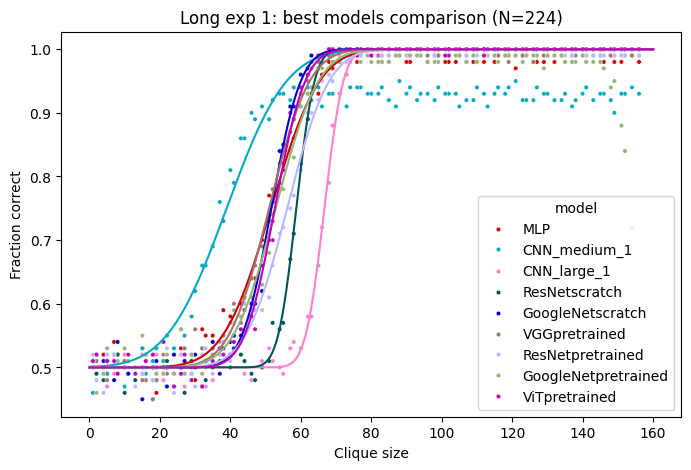

In [1001]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['MLP', 'CNN_medium_1', 'CNN_large_1', 'ResNetscratch', 'GoogLeNetscratch', 'VGGpretrained', 'ResNetpretrained', 'GoogLeNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# creating palette for the graph(concatenating the needed palettes):
my_palette_comparison = [my_palette_MLP, my_palette_CNN[2], my_palette_CNN[4], my_palette_scratch[1], my_palette_scratch[2], my_palette_pretrained[0], my_palette_pretrained[1], my_palette_pretrained[2], my_palette_pretrained[3]]
print(my_palette_comparison)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_comparison_longexp_1, x='clique size', y='fraction correct', hue='model', palette=my_palette_comparison, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_comparison_longexp_1[index][0]) / fitted_params_comparison_longexp_1[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_comparison[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Long exp 1: best models comparison (N=224)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-06-26_long-exp', 'comparison_fc_over_n_longexp_1'), dpi=300)

# Show the plot
plt.show()

In [1002]:
# creating a dataframe with all fitted parameters for long experiment:
df_fitted_params_longexp_1 = pd.concat([df_fitted_params_MLP, df_fitted_params_CNNs, df_fitted_params_scratch_models, df_fitted_params_pretrained_models])
df_fitted_params_longexp_1
# adding experiment type variable to the dataframe:
df_fitted_params_longexp_1['experiment'] = ['long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1', 'long1']
df_fitted_params_longexp_1

,k0,delta,model,experiment
0,5.155617e+01,1.075998e+01,MLP,long1
0,8.639928e+08,3.354231e+08,CNN_small_1,long1
1,1.828521e+02,1.526862e+01,CNN_small_2,long1
2,3.892552e+01,1.332826e+01,CNN_medium_1,long1
3,2.439175e+02,4.109342e+01,CNN_medium_2,long1
4,6.669712e+01,4.203833e+00,CNN_large_1,long1
5,2.375917e+06,7.826334e+05,CNN_large_2,long1
6,2.469260e+02,4.738802e+01,CNN_rudy,long1
0,4.382483e+07,1.641781e+07,VGGscratch,long1
1,5.871567e+01,4.055174e+00,ResNetscratch,long1


-------------------------

# 2024-07-10: Short-exp 2

## Files Location

Folder: `results\data\2024-07-10_short-exp`

## Parameters

**testing_parameters:**
  clique_testing_levels: 100
  max_clique_size_proportion_test: 0.7
  num_test: 24
  test_iterations: 16

**training_parameters:**
  clique_training_levels: 10
  learning_rate: 0.001
  loss_function: BCELoss
  max_clique_size_proportion: 0.5
  min_clique_size_proportion: 0.3
  min_delta: 0.02
  num_train: 24
  num_training_cycles: 5
  num_training_steps: 100
  num_val: 24
  optimizer: AdamW
  patience: 4
  save_step: 5
  val_exit_loss: 0.1


  NOTE: in this case, models were also trained from scratch

## MLP model

### Metrics

In [1003]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp', 'MLP','MLP_N224_metrics.csv')
df_MLP_metrics = pd.read_csv(file_path)
df_MLP_metrics['model'] = 'MLP'
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,12794,1032,18202,6372,0.925358,0.667536,0.775582,0.855991,MLP


### Psychometric curve

In [1004]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP fraction correct:
file_path = os.path.join('..','results', 'data', '2024-07-10_short-exp', 'MLP','MLP_N224_fraction_correct.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'
df_MLP

,clique size,fraction correct,model
0,156,0.99,MLP
1,154,0.98,MLP
2,152,0.98,MLP
3,151,0.96,MLP
4,149,0.97,MLP
...,...,...,...
95,7,0.51,MLP
96,5,0.50,MLP
97,4,0.48,MLP
98,2,0.47,MLP


In [1005]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_MLP = []
for df in [df_MLP]:
    fitted_params_MLP.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_MLP)  

# put these into a dataframe:
df_fitted_params_MLP = pd.DataFrame(fitted_params_MLP, columns=['k0', 'delta'])
df_fitted_params_MLP['model'] = ['MLP']   
df_fitted_params_MLP

[array([56.40849162, 16.63593806])]


,k0,delta,model
0,56.408492,16.635938,MLP


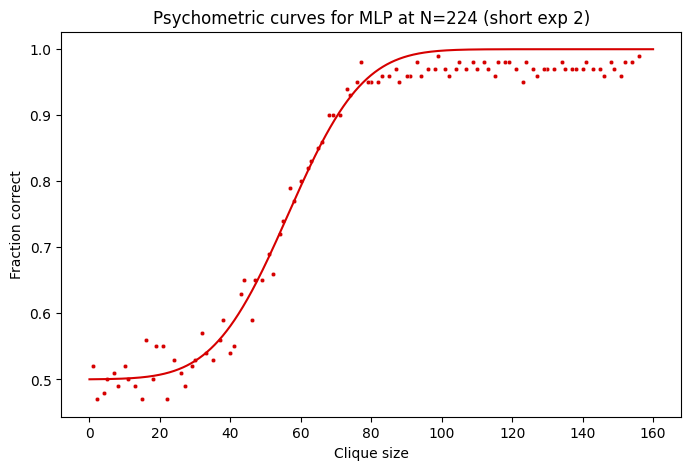

In [1006]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
MLP_model_names = ['MLP']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_MLP, x='clique size', y='fraction correct', color=my_palette_MLP, ax=ax, s=10)

# defining y values using fitted parameters
y_vals = (1 + ndtr((x_vals - fitted_params_MLP[0][0]) / fitted_params_MLP[0][1])) / 2
ax.plot(x_vals, y_vals, color=my_palette_MLP)

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for MLP at N=224 (short exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-10_short-exp', 'MLP_fc_over_n_shortexp_2'), dpi=300)

# Show the plot
plt.show()

In [1007]:
# adding K0 to metrics dataframe:
df_MLP_metrics['K0'] = fitted_params_MLP[0][0]
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,12794,1032,18202,6372,0.925358,0.667536,0.775582,0.855991,MLP,56.408492


## CNN models comparison

### Metrics

In [1008]:
# MODEL NAMES:
model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2']  

# CNN_small_1 metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_small_1','CNN_small_1_N224_metrics.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_small_2','CNN_small_2_N224_metrics.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_medium_1','CNN_medium_1_N224_metrics.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_medium_2','CNN_medium_2_N224_metrics.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_large_1','CNN_large_1_N224_metrics.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_large_2','CNN_large_2_N224_metrics.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN_rudy metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_rudy','CNN_rudy_N224_metrics.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs_metrics = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy])
df_CNNs_metrics


,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,13431,85,19172,5712,0.993711,0.701614,0.822499,0.890946,CNN_small_1
0,19072,19328,0,0,0.496667,1.000000,0.663697,0.855867,CNN_small_2
0,19119,19281,0,0,0.497891,1.000000,0.664789,0.500104,CNN_medium_1
0,19162,19238,0,0,0.499010,1.000000,0.665786,0.500000,CNN_medium_2
0,7876,0,19142,11382,1.000000,0.408973,0.580526,0.897692,CNN_large_1
0,19216,19184,0,0,0.500417,1.000000,0.667037,0.512407,CNN_large_2
0,19044,19356,0,0,0.495937,1.000000,0.663046,0.500000,CNN_rudy


### Psychometric curves

In [1009]:
# CNN_small_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_small_1','CNN_small_1_N224_fraction_correct.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_small_2','CNN_small_2_N224_fraction_correct.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_medium_1','CNN_medium_1_N224_fraction_correct.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_medium_2','CNN_medium_2_N224_fraction_correct.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_large_1','CNN_large_1_N224_fraction_correct.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_large_2','CNN_large_2_N224_fraction_correct.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN rudy fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','CNN_rudy','CNN_rudy_N224_fraction_correct.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy], ignore_index=True)
df_CNNs

,clique size,fraction correct,model
0,156,1.00,CNN_small_1
1,154,0.99,CNN_small_1
2,152,1.00,CNN_small_1
3,151,1.00,CNN_small_1
4,149,1.00,CNN_small_1
...,...,...,...
695,7,0.53,CNN_rudy
696,5,0.50,CNN_rudy
697,4,0.48,CNN_rudy
698,2,0.50,CNN_rudy


In [1010]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_CNNs = []
for df in [df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy]:
    fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_CNNs)  

# put these into a dataframe:
df_fitted_params_CNNs = pd.DataFrame(fitted_params_CNNs, columns=['k0', 'delta'])
df_fitted_params_CNNs['model'] = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']   
df_fitted_params_CNNs

[array([47.29515749,  7.49090579]), array([2073.82974918,  239.04180318]), array([549.80705104,  61.3012113 ]), array([560.81681511, 147.18268291]), array([92.45059767,  2.30745982]), array([4694520.62514547, 1400125.30243976]), array([398.52528182,  34.61220092])]


C:\Users\danie\AppData\Local\Temp\ipykernel_23184\3160746336.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
C:\Users\danie\AppData\Local\Temp\ipykernel_23184\3160746336.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])


,k0,delta,model
0,4.729516e+01,7.490906e+00,CNN_small_1
1,2.073830e+03,2.390418e+02,CNN_small_2
2,5.498071e+02,6.130121e+01,CNN_medium_1
3,5.608168e+02,1.471827e+02,CNN_medium_2
4,9.245060e+01,2.307460e+00,CNN_large_1
5,4.694521e+06,1.400125e+06,CNN_large_2
6,3.985253e+02,3.461220e+01,CNN_rudy


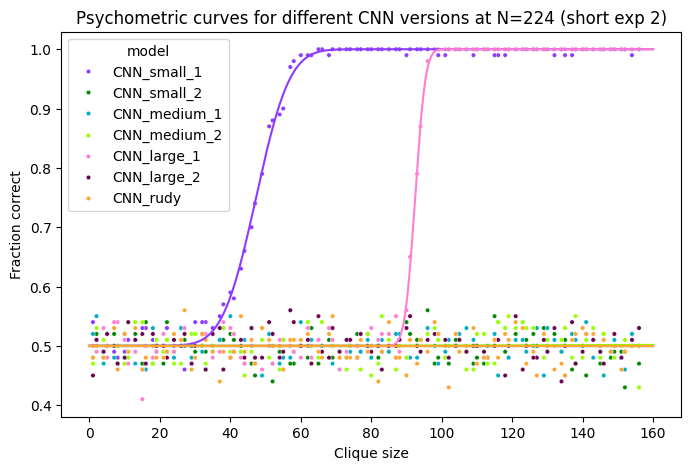

In [1011]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
CNNs_model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_CNNs, x='clique size', y='fraction correct', hue='model', palette=my_palette_CNN, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(CNNs_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_CNNs[index][0]) / fitted_params_CNNs[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_CNN[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different CNN versions at N=224 (short exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-10_short-exp', 'CNN_versions_fc_over_n_shortexp_2'), dpi=300)

# Show the plot
plt.show()

In [1012]:
# adding K0 to metrics dataframe:
df_CNNs_metrics['K0'] = [fitted_params_CNNs[0][0], fitted_params_CNNs[1][0], fitted_params_CNNs[2][0], fitted_params_CNNs[3][0], fitted_params_CNNs[4][0], fitted_params_CNNs[5][0], fitted_params_CNNs[6][0]]
df_CNNs_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,13431,85,19172,5712,0.993711,0.701614,0.822499,0.890946,CNN_small_1,4.729516e+01
0,19072,19328,0,0,0.496667,1.000000,0.663697,0.855867,CNN_small_2,2.073830e+03
0,19119,19281,0,0,0.497891,1.000000,0.664789,0.500104,CNN_medium_1,5.498071e+02
0,19162,19238,0,0,0.499010,1.000000,0.665786,0.500000,CNN_medium_2,5.608168e+02
0,7876,0,19142,11382,1.000000,0.408973,0.580526,0.897692,CNN_large_1,9.245060e+01
0,19216,19184,0,0,0.500417,1.000000,0.667037,0.512407,CNN_large_2,4.694521e+06
0,19044,19356,0,0,0.495937,1.000000,0.663046,0.500000,CNN_rudy,3.985253e+02


## Scratch models comparison

### Metrics

In [1013]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','VGG16scratch','VGG16scratch_N224_metrics.csv')
df_VGGscratch = pd.read_csv(file_path)
df_VGGscratch['model'] = 'VGGscratch'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','ResNet50scratch','ResNet50scratch_N224_metrics.csv')
df_RESNETscratch = pd.read_csv(file_path)
df_RESNETscratch['model'] = 'ResNetscratch'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','GoogleNetscratch','GoogleNetscratch_N224_metrics.csv')
df_GOOGLENETscratch = pd.read_csv(file_path)
df_GOOGLENETscratch['model'] = 'GoogleNetscratch'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','VITscratch','VITscratch_N224_metrics.csv')
df_VITscratch = pd.read_csv(file_path)
df_VITscratch['model'] = 'ViTscratch'

# concatenating all dataframes:
df_scratch_metrics = pd.concat([df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch])
df_scratch_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,19209,19191,0,0,0.500234,1.000000,0.666875,0.500000,VGGscratch
0,18156,13271,5886,1087,0.577720,0.943512,0.716637,0.890437,ResNetscratch
0,9660,0,19170,9570,1.000000,0.502340,0.668744,0.888156,GoogleNetscratch
0,9948,2244,16998,9210,0.815945,0.519261,0.634641,0.754397,ViTscratch


### Psychometric curves

In [1014]:
# VGG fraction_correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','VGG16scratch','VGG16scratch_N224_fraction_correct.csv')
df_VGGscratch = pd.read_csv(file_path)
df_VGGscratch['model'] = 'VGGscratch'
# ResNet fraction_correct:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','ResNet50scratch','ResNet50scratch_N224_fraction_correct.csv')
df_RESNETscratch = pd.read_csv(file_path)
df_RESNETscratch['model'] = 'ResNetscratch'
# GoogleNet fraction_correct:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','GoogleNetscratch','GoogleNetscratch_N224_fraction_correct.csv')
df_GOOGLENETscratch = pd.read_csv(file_path)
df_GOOGLENETscratch['model'] = 'GoogleNetscratch'
# ViT fraction_correct:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','VITscratch','VITscratch_N224_fraction_correct.csv')
df_VITscratch = pd.read_csv(file_path)
df_VITscratch['model'] = 'ViTscratch'

# concatenating all dataframes:
df_scratch_fraction_correct = pd.concat([df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch])
df_scratch_fraction_correct

,clique size,fraction correct,model
0,156,0.49,VGGscratch
1,154,0.47,VGGscratch
2,152,0.48,VGGscratch
3,151,0.52,VGGscratch
4,149,0.51,VGGscratch
...,...,...,...
95,7,0.49,ViTscratch
96,5,0.48,ViTscratch
97,4,0.51,ViTscratch
98,2,0.51,ViTscratch


In [1015]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_scratch_models = []
for df in [df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch]:
    fitted_params_scratch_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_scratch_models)  

# put these into a dataframe:
df_fitted_params_scratch_models = pd.DataFrame(fitted_params_scratch_models, columns=['k0', 'delta'])
df_fitted_params_scratch_models['model'] = ['VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch']   
df_fitted_params_scratch_models

[array([6227818.23152805, 1857413.08776943]), array([237.11599367, 235.68619437]), array([77.5361781 ,  3.85598229]), array([90.75055578, 32.20328182])]


,k0,delta,model
0,6.227818e+06,1.857413e+06,VGGscratch
1,2.371160e+02,2.356862e+02,ResNetscratch
2,7.753618e+01,3.855982e+00,GoogleNetscratch
3,9.075056e+01,3.220328e+01,ViTscratch


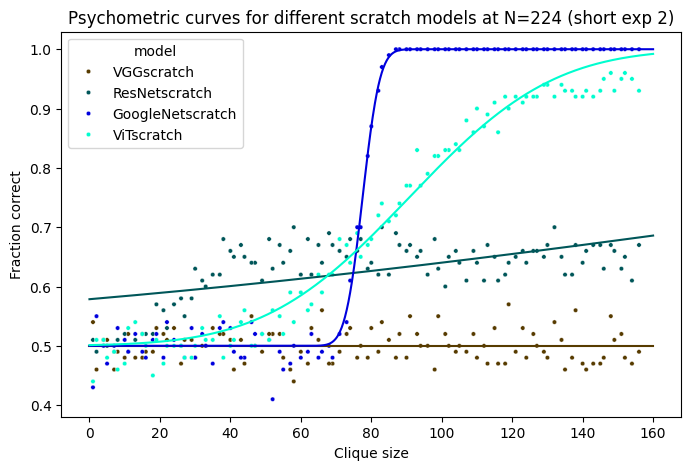

In [1016]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
scratch_model_names = ['VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_scratch_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_scratch, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(scratch_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_scratch_models[index][0]) / fitted_params_scratch_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_scratch[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different scratch models at N=224 (short exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-10_short-exp', 'scratch_models_fc_over_n_shortexp_2'), dpi=300)

# Show the plot
plt.show()

In [1017]:
# adding K0 to metrics dataframe:
df_scratch_metrics['K0'] = [fitted_params_scratch_models[0][0], fitted_params_scratch_models[1][0], fitted_params_scratch_models[2][0], fitted_params_scratch_models[3][0]]
df_scratch_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,19209,19191,0,0,0.500234,1.000000,0.666875,0.500000,VGGscratch,6.227818e+06
0,18156,13271,5886,1087,0.577720,0.943512,0.716637,0.890437,ResNetscratch,2.371160e+02
0,9660,0,19170,9570,1.000000,0.502340,0.668744,0.888156,GoogleNetscratch,7.753618e+01
0,9948,2244,16998,9210,0.815945,0.519261,0.634641,0.754397,ViTscratch,9.075056e+01


## Pretrained models comparison

### Metrics

In [1018]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','VGG16pretrained','VGG16pretrained_N224_metrics.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','ResNet50pretrained','ResNet50pretrained_N224_metrics.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','GoogleNetpretrained','GoogleNetpretrained_N224_metrics.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','VITpretrained','VITpretrained_N224_metrics.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_metrics = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained])
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,12721,264,18994,6421,0.979669,0.664560,0.791920,0.869599,VGGpretrained
0,12570,540,18723,6567,0.958810,0.656843,0.779607,0.855117,ResNetpretrained
0,12682,421,18765,6532,0.967870,0.660040,0.784850,0.860540,GoogleNetpretrained
0,12922,237,18867,6374,0.981990,0.669672,0.796303,0.873272,ViTpretrained


### Psychometric curves

In [1019]:
# VGG fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-10_short-exp','VGG16pretrained','VGG16pretrained_N224_fraction_correct.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet fraction correct:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','ResNet50pretrained','ResNet50pretrained_N224_fraction_correct.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet fraction correct:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','GoogleNetpretrained','GoogleNetpretrained_N224_fraction_correct.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT fraction correct:
file_path = os.path.join('..','results','data','2024-07-10_short-exp','VITpretrained','VITpretrained_N224_fraction_correct.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_fraction_correct = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained], ignore_index=True)
df_pretrained_fraction_correct

,clique size,fraction correct,model
0,156,0.99,VGGpretrained
1,154,0.99,VGGpretrained
2,152,0.98,VGGpretrained
3,151,0.99,VGGpretrained
4,149,1.00,VGGpretrained
...,...,...,...
395,7,0.52,ViTpretrained
396,5,0.49,ViTpretrained
397,4,0.54,ViTpretrained
398,2,0.50,ViTpretrained


In [1020]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_pretrained_models = []
for df in [df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained]:
    fitted_params_pretrained_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_pretrained_models)  

# put these into a dataframe:
df_fitted_params_pretrained_models = pd.DataFrame(fitted_params_pretrained_models, columns=['k0', 'delta'])
df_fitted_params_pretrained_models['model'] = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']   
df_fitted_params_pretrained_models

[array([53.6170122 ,  8.54087252]), array([56.08095317,  9.40506136]), array([54.76953249, 10.16359637]), array([53.27001315,  8.7640984 ])]


,k0,delta,model
0,53.617012,8.540873,VGGpretrained
1,56.080953,9.405061,ResNetpretrained
2,54.769532,10.163596,GoogleNetpretrained
3,53.270013,8.764098,ViTpretrained


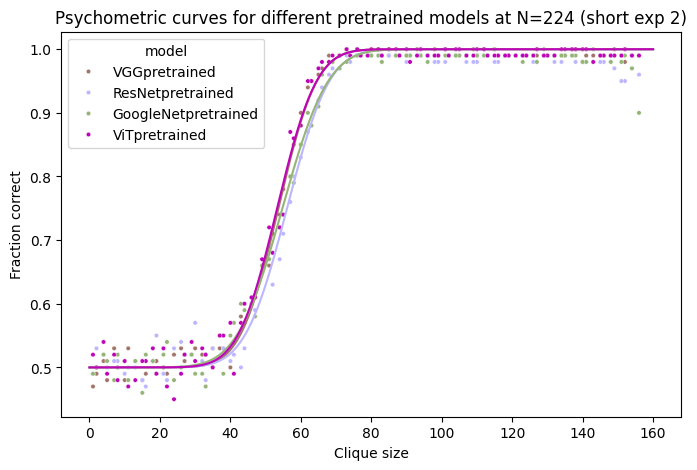

In [1021]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
pretrained_model_names = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_pretrained_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_pretrained, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(pretrained_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_pretrained_models[index][0]) / fitted_params_pretrained_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_pretrained[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different pretrained models at N=224 (short exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-10_short-exp', 'pretrained_models_fc_over_n_shortexp_2'), dpi=300)

# Show the plot
plt.show()

In [1022]:
# adding K0 to metrics dataframe:
df_pretrained_metrics['K0'] = [fitted_params_pretrained_models[0][0], fitted_params_pretrained_models[1][0], fitted_params_pretrained_models[2][0], fitted_params_pretrained_models[3][0]]
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,12721,264,18994,6421,0.979669,0.664560,0.791920,0.869599,VGGpretrained,53.617012
0,12570,540,18723,6567,0.958810,0.656843,0.779607,0.855117,ResNetpretrained,56.080953
0,12682,421,18765,6532,0.967870,0.660040,0.784850,0.860540,GoogleNetpretrained,54.769532
0,12922,237,18867,6374,0.981990,0.669672,0.796303,0.873272,ViTpretrained,53.270013


## Comparing MLP with best CNN model and pretrained models

### Metrics

In [1023]:
# merging all metrics dataframes:
df_all_metrics_shortexp_2 = pd.concat([df_MLP_metrics, df_CNNs_metrics, df_scratch_metrics, df_pretrained_metrics], ignore_index=True)
df_all_metrics_shortexp_2
# write K0 column in decimal notation:
df_all_metrics_shortexp_2['K0'] = df_all_metrics_shortexp_2['K0'].apply(lambda x: '{:.2f}'.format(x))
# rounding all values to 2 decimal places:
df_all_metrics_shortexp_2 = df_all_metrics_shortexp_2.round(2)
df_all_metrics_shortexp_2
# putting "model" variable in first place:
cols = ['model'] + [col for col in df_all_metrics_shortexp_2.columns if col != 'model']
df_all_metrics_shortexp_2 = df_all_metrics_shortexp_2[cols]
df_all_metrics_shortexp_2

,model,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,K0
0,MLP,12794,1032,18202,6372,0.93,0.67,0.78,0.86,56.41
1,CNN_small_1,13431,85,19172,5712,0.99,0.70,0.82,0.89,47.30
2,CNN_small_2,19072,19328,0,0,0.50,1.00,0.66,0.86,2073.83
3,CNN_medium_1,19119,19281,0,0,0.50,1.00,0.66,0.50,549.81
4,CNN_medium_2,19162,19238,0,0,0.50,1.00,0.67,0.50,560.82
5,CNN_large_1,7876,0,19142,11382,1.00,0.41,0.58,0.90,92.45
6,CNN_large_2,19216,19184,0,0,0.50,1.00,0.67,0.51,4694520.63
7,CNN_rudy,19044,19356,0,0,0.50,1.00,0.66,0.50,398.53
8,VGGscratch,19209,19191,0,0,0.50,1.00,0.67,0.50,6227818.23
9,ResNetscratch,18156,13271,5886,1087,0.58,0.94,0.72,0.89,237.12


### Psychometric curves

In [1024]:
# merging dataframes for comparison:
df_comparison_shortexp_2 = pd.concat([df_MLP, df_CNN_small_1, df_CNN_large_1, df_GOOGLENETscratch, df_VITscratch, df_pretrained_fraction_correct])
df_comparison_shortexp_2
# - CNNs: best CNN models are CNN_ksconv3_kspool3 (CNN_small_1) and CNN_ksconv9_kspool3 (CNN_large_1)
fitted_params_CNNs[0]
fitted_params_CNNs[4]   
# - scratch models: best models are GoogleNet and ViT
fitted_params_scratch_models[2]   # GoogleNet
fitted_params_scratch_models[3]   # ViT
# - pretrained models: all performing similarly well
fitted_params_comparison_shortexp_2 = [fitted_params_MLP[0], fitted_params_CNNs[0], fitted_params_CNNs[4], fitted_params_scratch_models[2], fitted_params_scratch_models[3], fitted_params_pretrained_models[0], fitted_params_pretrained_models[1], fitted_params_pretrained_models[2], fitted_params_pretrained_models[3]]
fitted_params_comparison_shortexp_2

[array([56.40849162, 16.63593806]),
 array([47.29515749,  7.49090579]),
 array([92.45059767,  2.30745982]),
 array([77.5361781 ,  3.85598229]),
 array([90.75055578, 32.20328182]),
 array([53.6170122 ,  8.54087252]),
 array([56.08095317,  9.40506136]),
 array([54.76953249, 10.16359637]),
 array([53.27001315,  8.7640984 ])]

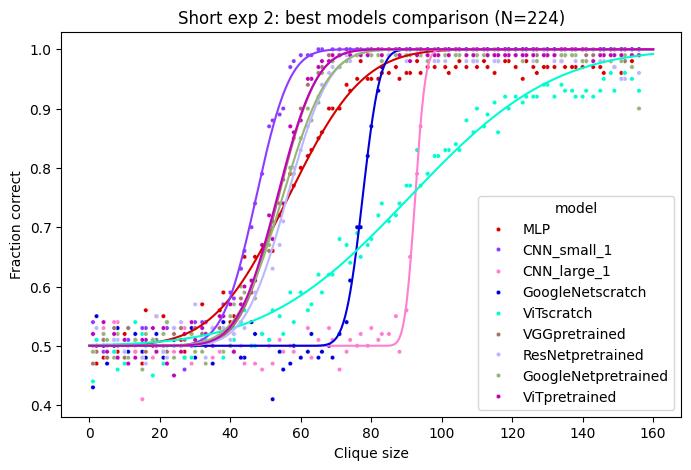

In [1025]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['MLP', 'CNN_small_1', 'CNN_large_1', 'GoogleNetscratch', 'ViTscratch', 'VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# composing palette for the graph
my_palette_comparison = [my_palette_MLP, my_palette_CNN[0], my_palette_CNN[4], my_palette_scratch[2], my_palette_scratch[3], my_palette_pretrained[0], my_palette_pretrained[1], my_palette_pretrained[2], my_palette_pretrained[3]]

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_comparison_shortexp_2, x='clique size', y='fraction correct', hue='model', palette=my_palette_comparison, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_comparison_shortexp_2[index][0]) / fitted_params_comparison_shortexp_2[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_comparison[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Short exp 2: best models comparison (N=224)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-10_short-exp', 'comparison_fc_over_n_shortexp_2'), dpi=300)

# Show the plot
plt.show()

In [1026]:
# creating a dataframe with all fitted parameters for short experiment:
df_fitted_params_shortexp_2 = pd.concat([df_fitted_params_MLP, df_fitted_params_CNNs, df_fitted_params_scratch_models, df_fitted_params_pretrained_models])
df_fitted_params_shortexp_2
# adding experiment type variable to the dataframe:
df_fitted_params_shortexp_2['experiment'] = 'short2'
df_fitted_params_shortexp_2

,k0,delta,model,experiment
0,5.640849e+01,1.663594e+01,MLP,short2
0,4.729516e+01,7.490906e+00,CNN_small_1,short2
1,2.073830e+03,2.390418e+02,CNN_small_2,short2
2,5.498071e+02,6.130121e+01,CNN_medium_1,short2
3,5.608168e+02,1.471827e+02,CNN_medium_2,short2
4,9.245060e+01,2.307460e+00,CNN_large_1,short2
5,4.694521e+06,1.400125e+06,CNN_large_2,short2
6,3.985253e+02,3.461220e+01,CNN_rudy,short2
0,6.227818e+06,1.857413e+06,VGGscratch,short2
1,2.371160e+02,2.356862e+02,ResNetscratch,short2


# 2024-07-11: Long-exp 2

## Files Location

Folder: `results\data\2024-07-11_long-exp`
- **MLP data:** `\MLP`
- **CNN data (small_1/2, large_1/2, medium_1/2, CNN_rudy(normal conv)):** ``\CNN_...`
- **VGG data (scratch + pretrained):** `\VGG16pretrained` \ `\VGG16scratch`
- **RESNET (scratch + pretrained):** `\ResNet50pretrained` \ `\ResNet50scratch`
- **GOOGLENET (scratch + pretrained):** ``
- **VIT (scratch + pretrained):** ``

## Parameters

NOTE: differences with "short-exp" are in bold

**training_parameters:**
  num_training_steps: 100
  **num_training_cycles: 10**
  **num_train: 36**
  **num_val: 36**
  **learning_rate: 0.01**
  max_clique_size_proportion: 0.5
  min_clique_size_proportion: 0.3
  clique_training_levels: 10
  save_step: 5
  optimizer: AdamW
  loss_function: BCELoss
  **patience: 10**
  min_delta: 0.02
  val_exit_loss: 0.1

**testing_parameters:**
  max_clique_size_proportion_test: 0.7
  **num_test: 36** 
  clique_testing_levels: 100
  test_iterations: 16

Also the CNN models have **l1=100 in the longer exp**, while **l1=135 in the shorter exp**


## MLP model

### Metrics

In [1027]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','MLP','MLP_N224_metrics.csv')
df_MLP_metrics = pd.read_csv(file_path)
df_MLP_metrics['model'] = 'MLP'
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,19741,707,27889,9263,0.965424,0.68063,0.79839,0.873608,MLP


### Psychometric curve

In [1028]:
# MODEL NAMES:
model_names = ['MLP']  

# MLP fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','MLP','MLP_N224_fraction_correct.csv')
df_MLP = pd.read_csv(file_path)
df_MLP['model'] = 'MLP'
df_MLP

,clique size,fraction correct,model
0,156,1.00,MLP
1,154,0.99,MLP
2,152,0.99,MLP
3,151,0.99,MLP
4,149,0.99,MLP
...,...,...,...
95,7,0.50,MLP
96,5,0.52,MLP
97,4,0.52,MLP
98,2,0.49,MLP


In [1029]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_MLP = []
for df in [df_MLP]:
    fitted_params_MLP.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_MLP)  

# put these into a dataframe:
df_fitted_params_MLP = pd.DataFrame(fitted_params_MLP, columns=['k0', 'delta'])
df_fitted_params_MLP['model'] = ['MLP']   
df_fitted_params_MLP

[array([52.4282653 , 10.48870556])]


,k0,delta,model
0,52.428265,10.488706,MLP


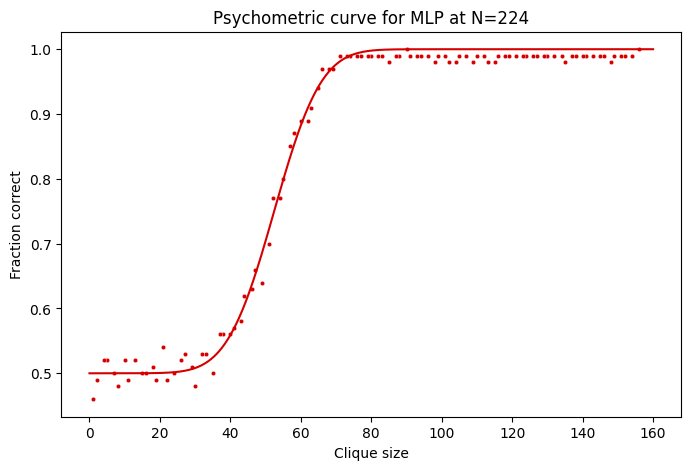

In [1030]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
MLP_model_names = ['MLP']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_MLP, x='clique size', y='fraction correct', color=my_palette_MLP, ax=ax, s=10)

# defining y values using fitted parameters
y_vals = (1 + ndtr((x_vals - fitted_params_MLP[0][0]) / fitted_params_MLP[0][1])) / 2
ax.plot(x_vals, y_vals, color=my_palette_MLP)

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curve for MLP at N=224")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-11_long-exp', 'MLP_fc_over_n_longexp_2'), dpi=300)

# Show the plot
plt.show()

In [1031]:
# adding K0 to metrics dataframe:
df_MLP_metrics['K0'] = fitted_params_MLP[0][0]
df_MLP_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,19741,707,27889,9263,0.965424,0.68063,0.79839,0.873608,MLP,52.428265


## CNN models comparison

In [1032]:
# MODEL NAMES:
model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2']  

# CNN_small_1 metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_small_1','CNN_small_1_N224_metrics.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_small_2','CNN_small_2_N224_metrics.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_medium_1','CNN_medium_1_N224_metrics.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_medium_2','CNN_medium_2_N224_metrics.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_large_1','CNN_large_1_N224_metrics.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_large_2','CNN_large_2_N224_metrics.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN_rudy metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp', 'CNN_rudy','CNN_rudy_N224_metrics.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs_metrics = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy])
df_CNNs_metrics


,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,16709,0,28906,11985,1.000000,0.582317,0.736031,0.882670,CNN_small_1
0,28809,28791,0,0,0.500156,1.000000,0.666806,0.344891,CNN_small_2
0,28834,28766,0,0,0.500590,1.000000,0.667191,0.689875,CNN_medium_1
0,15911,0,28692,12997,1.000000,0.550401,0.710011,0.808617,CNN_medium_2
0,17143,0,28820,11637,1.000000,0.595657,0.746598,0.902624,CNN_large_1
0,28718,28882,0,0,0.498576,1.000000,0.665400,0.500000,CNN_large_2
0,28772,28828,0,0,0.499514,1.000000,0.666234,0.500000,CNN_rudy


### Psychometric curves

In [1033]:
# CNN_small_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_small_1','CNN_small_1_N224_fraction_correct.csv')
df_CNN_small_1 = pd.read_csv(file_path)
df_CNN_small_1['model'] = 'CNN_small_1'
# CNN_small_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_small_2','CNN_small_2_N224_fraction_correct.csv')
df_CNN_small_2 = pd.read_csv(file_path)
df_CNN_small_2['model'] = 'CNN_small_2'
# CNN_medium_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_medium_1','CNN_medium_1_N224_fraction_correct.csv')
df_CNN_medium_1 = pd.read_csv(file_path)
df_CNN_medium_1['model'] = 'CNN_medium_1'
# CNN_medium_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_medium_2','CNN_medium_2_N224_fraction_correct.csv')
df_CNN_medium_2 = pd.read_csv(file_path)
df_CNN_medium_2['model'] = 'CNN_medium_2'
# CNN_large_1 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_large_1','CNN_large_1_N224_fraction_correct.csv')
df_CNN_large_1 = pd.read_csv(file_path)
df_CNN_large_1['model'] = 'CNN_large_1'
# CNN_large_2 fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_large_2','CNN_large_2_N224_fraction_correct.csv')
df_CNN_large_2 = pd.read_csv(file_path)
df_CNN_large_2['model'] = 'CNN_large_2'
# CNN rudy fraction correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','CNN_rudy','CNN_rudy_N224_fraction_correct.csv')
df_CNN_rudy = pd.read_csv(file_path)
df_CNN_rudy['model'] = 'CNN_rudy'

# concatenating all dataframes:
df_CNNs = pd.concat([df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy], ignore_index=True)
df_CNNs

,clique size,fraction correct,model
0,156,1.00,CNN_small_1
1,154,1.00,CNN_small_1
2,152,1.00,CNN_small_1
3,151,1.00,CNN_small_1
4,149,1.00,CNN_small_1
...,...,...,...
695,7,0.48,CNN_rudy
696,5,0.49,CNN_rudy
697,4,0.52,CNN_rudy
698,2,0.49,CNN_rudy


In [1034]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_CNNs = []
for df in [df_CNN_small_1, df_CNN_small_2, df_CNN_medium_1, df_CNN_medium_2, df_CNN_large_1, df_CNN_large_2, df_CNN_rudy]:
    fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_CNNs)  

# put these into a dataframe:
df_fitted_params_CNNs = pd.DataFrame(fitted_params_CNNs, columns=['k0', 'delta'])
df_fitted_params_CNNs['model'] = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']   
df_fitted_params_CNNs

[array([65.24131833,  5.38743704]), array([38639876.80508301, 12503797.66266697]), array([2.11271094e+08, 6.69445239e+07]), array([70.43494677,  4.84191215]), array([63.11952907,  3.11835636]), array([179.06338548,  12.69702597]), array([156.35171874,   0.27444759])]


C:\Users\danie\AppData\Local\Temp\ipykernel_23184\3160746336.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  fitted_params_CNNs.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])


,k0,delta,model
0,6.524132e+01,5.387437e+00,CNN_small_1
1,3.863988e+07,1.250380e+07,CNN_small_2
2,2.112711e+08,6.694452e+07,CNN_medium_1
3,7.043495e+01,4.841912e+00,CNN_medium_2
4,6.311953e+01,3.118356e+00,CNN_large_1
5,1.790634e+02,1.269703e+01,CNN_large_2
6,1.563517e+02,2.744476e-01,CNN_rudy


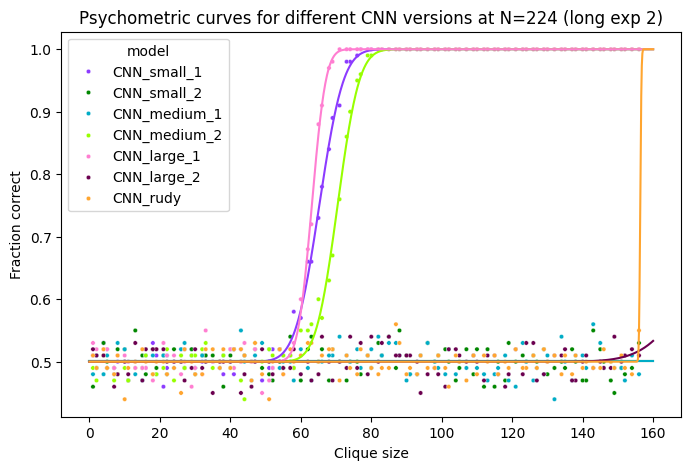

In [1035]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
CNNs_model_names = ['CNN_small_1', 'CNN_small_2', 'CNN_medium_1', 'CNN_medium_2', 'CNN_large_1', 'CNN_large_2', 'CNN_rudy']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_CNNs, x='clique size', y='fraction correct', hue='model', palette=my_palette_CNN, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(CNNs_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_CNNs[index][0]) / fitted_params_CNNs[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_CNN[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different CNN versions at N=224 (long exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-11_long-exp', 'CNN_versions_fc_over_n_longexp_2'), dpi=300)

# Show the plot
plt.show()

In [1036]:
# adding K0 to metrics dataframe:
df_CNNs_metrics['K0'] = [fitted_params_CNNs[0][0], fitted_params_CNNs[1][0], fitted_params_CNNs[2][0], fitted_params_CNNs[3][0], fitted_params_CNNs[4][0], fitted_params_CNNs[5][0], fitted_params_CNNs[6][0]]
df_CNNs_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,16709,0,28906,11985,1.000000,0.582317,0.736031,0.882670,CNN_small_1,6.524132e+01
0,28809,28791,0,0,0.500156,1.000000,0.666806,0.344891,CNN_small_2,3.863988e+07
0,28834,28766,0,0,0.500590,1.000000,0.667191,0.689875,CNN_medium_1,2.112711e+08
0,15911,0,28692,12997,1.000000,0.550401,0.710011,0.808617,CNN_medium_2,7.043495e+01
0,17143,0,28820,11637,1.000000,0.595657,0.746598,0.902624,CNN_large_1,6.311953e+01
0,28718,28882,0,0,0.498576,1.000000,0.665400,0.500000,CNN_large_2,1.790634e+02
0,28772,28828,0,0,0.499514,1.000000,0.666234,0.500000,CNN_rudy,1.563517e+02


## Scratch models comparison

### Metrics

In [1037]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','VGG16scratch','VGG16scratch_N224_metrics.csv')
df_VGGscratch = pd.read_csv(file_path)
df_VGGscratch['model'] = 'VGGscratch'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','ResNet50scratch','ResNet50scratch_N224_metrics.csv')
df_RESNETscratch = pd.read_csv(file_path)
df_RESNETscratch['model'] = 'ResNetscratch'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','GoogleNetscratch','GoogleNetscratch_N224_metrics.csv')
df_GOOGLENETscratch = pd.read_csv(file_path)
df_GOOGLENETscratch['model'] = 'GoogleNetscratch'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','VITscratch','VITscratch_N224_metrics.csv')
df_VITscratch = pd.read_csv(file_path)
df_VITscratch['model'] = 'ViTscratch'

# concatenating all dataframes:
df_scratch_metrics = pd.concat([df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch])
df_scratch_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,28899,28701,0,0,0.501719,1.000000,0.668193,0.500000,VGGscratch
0,17710,0,28877,11013,1.000000,0.616579,0.762820,0.893643,ResNetscratch
0,9544,0,28819,19237,1.000000,0.331608,0.498056,0.833791,GoogleNetscratch
0,0,0,28815,28785,0.000000,0.000000,0.000000,0.304037,ViTscratch


### Psychometric curves

In [1038]:
# VGG fraction_correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','VGG16scratch','VGG16scratch_N224_fraction_correct.csv')
df_VGGscratch = pd.read_csv(file_path)
df_VGGscratch['model'] = 'VGGscratch'
# ResNet fraction_correct:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','ResNet50scratch','ResNet50scratch_N224_fraction_correct.csv')
df_RESNETscratch = pd.read_csv(file_path)
df_RESNETscratch['model'] = 'ResNetscratch'
# GoogleNet fraction_correct:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','GoogleNetscratch','GoogleNetscratch_N224_fraction_correct.csv')
df_GOOGLENETscratch = pd.read_csv(file_path)
df_GOOGLENETscratch['model'] = 'GoogleNetscratch'
# ViT fraction_correct:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','VITscratch','VITscratch_N224_fraction_correct.csv')
df_VITscratch = pd.read_csv(file_path)
df_VITscratch['model'] = 'ViTscratch'

# concatenating all dataframes:
df_scratch_fraction_correct = pd.concat([df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch])
df_scratch_fraction_correct

,clique size,fraction correct,model
0,156,0.51,VGGscratch
1,154,0.51,VGGscratch
2,152,0.53,VGGscratch
3,151,0.52,VGGscratch
4,149,0.50,VGGscratch
...,...,...,...
95,7,0.48,ViTscratch
96,5,0.52,ViTscratch
97,4,0.53,ViTscratch
98,2,0.49,ViTscratch


In [1039]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_scratch_models = []
for df in [df_VGGscratch, df_RESNETscratch, df_GOOGLENETscratch, df_VITscratch]:
    fitted_params_scratch_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_scratch_models)  

# put these into a dataframe:
df_fitted_params_scratch_models = pd.DataFrame(fitted_params_scratch_models, columns=['k0', 'delta'])
df_fitted_params_scratch_models['model'] = ['VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch']   
df_fitted_params_scratch_models

[array([227.0168336 ,  41.36374361]), array([59.70980596,  4.4476343 ]), array([103.83228601,   3.75459772]), array([59104.50061759, 17601.74255765])]


,k0,delta,model
0,227.016834,41.363744,VGGscratch
1,59.709806,4.447634,ResNetscratch
2,103.832286,3.754598,GoogleNetscratch
3,59104.500618,17601.742558,ViTscratch


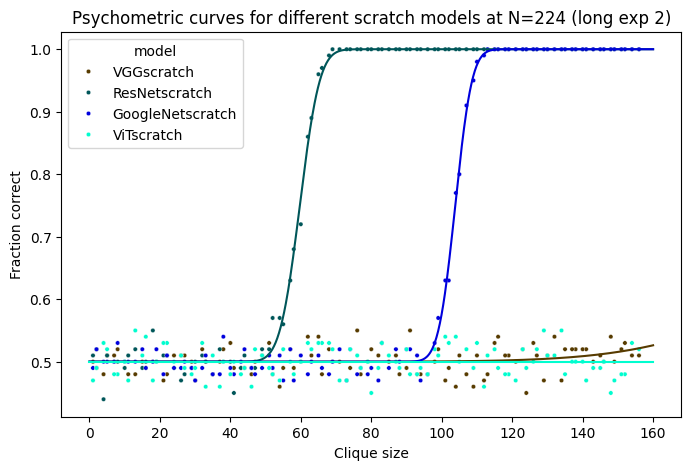

In [1040]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
scratch_model_names = ['VGGscratch', 'ResNetscratch', 'GoogleNetscratch', 'ViTscratch']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_scratch_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_scratch, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(scratch_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_scratch_models[index][0]) / fitted_params_scratch_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_scratch[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different scratch models at N=224 (long exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-11_long-exp', 'scratch_models_fc_over_n_longexp_2'), dpi=300)

# Show the plot
plt.show()

In [1041]:
# adding K0 to metrics dataframe:
df_scratch_metrics['K0'] = [fitted_params_scratch_models[0][0], fitted_params_scratch_models[1][0], fitted_params_scratch_models[2][0], fitted_params_scratch_models[3][0]]
df_scratch_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,28899,28701,0,0,0.501719,1.000000,0.668193,0.500000,VGGscratch,227.016834
0,17710,0,28877,11013,1.000000,0.616579,0.762820,0.893643,ResNetscratch,59.709806
0,9544,0,28819,19237,1.000000,0.331608,0.498056,0.833791,GoogleNetscratch,103.832286
0,0,0,28815,28785,0.000000,0.000000,0.000000,0.304037,ViTscratch,59104.500618


## Pretrained models comparison

### Metrics

In [1042]:
# VGG metrics:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','VGG16pretrained','VGG16pretrained_N224_metrics.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet metrics:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','ResNet50pretrained','ResNet50pretrained_N224_metrics.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet metrics:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','GoogleNetpretrained','GoogleNetpretrained_N224_metrics.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT metrics:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','VITpretrained','VITpretrained_N224_metrics.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_metrics = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained])
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model
0,19070,226,28730,9574,0.988288,0.665759,0.795578,0.874746,VGGpretrained
0,19722,870,27736,9272,0.957751,0.680210,0.795466,0.863721,ResNetpretrained
0,16478,69,28808,12245,0.995830,0.573687,0.727988,0.849599,GoogleNetpretrained
0,20822,1206,27792,7780,0.945251,0.727991,0.822516,0.883049,ViTpretrained


### Psychometric curves

In [1043]:
# VGG fraction_correct:
file_path = os.path.join('..','results', 'data','2024-07-11_long-exp','VGG16pretrained','VGG16pretrained_N224_fraction_correct.csv')
df_VGGpretrained = pd.read_csv(file_path)
df_VGGpretrained['model'] = 'VGGpretrained'
# ResNet fraction_correct:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','ResNet50pretrained','ResNet50pretrained_N224_fraction_correct.csv')
df_RESNETpretrained = pd.read_csv(file_path)
df_RESNETpretrained['model'] = 'ResNetpretrained'
# GoogleNet fraction_correct:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','GoogleNetpretrained','GoogleNetpretrained_N224_fraction_correct.csv')
df_GOOGLENETpretrained = pd.read_csv(file_path)
df_GOOGLENETpretrained['model'] = 'GoogleNetpretrained'
# ViT fraction_correct:
file_path = os.path.join('..','results','data','2024-07-11_long-exp','VITpretrained','VITpretrained_N224_fraction_correct.csv')
df_VITpretrained = pd.read_csv(file_path)
df_VITpretrained['model'] = 'ViTpretrained'

# concatenating all dataframes:
df_pretrained_fraction_correct = pd.concat([df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained])
df_pretrained_fraction_correct

,clique size,fraction correct,model
0,156,0.99,VGGpretrained
1,154,0.99,VGGpretrained
2,152,1.00,VGGpretrained
3,151,1.00,VGGpretrained
4,149,1.00,VGGpretrained
...,...,...,...
95,7,0.53,ViTpretrained
96,5,0.51,ViTpretrained
97,4,0.53,ViTpretrained
98,2,0.52,ViTpretrained


In [1044]:
# defining the sigmoid function to fit to the data:
def sigmoid(k, k0, delta):
    return (1+ndtr((k-k0)/delta))/2
# creating unique array and populating it:
fitted_params_pretrained_models = []
for df in [df_VGGpretrained, df_RESNETpretrained, df_GOOGLENETpretrained, df_VITpretrained]:
    fitted_params_pretrained_models.append(curve_fit(sigmoid, df['clique size'], df['fraction correct'], p0=(70, 20))[0])
print(fitted_params_pretrained_models)  

# put these into a dataframe:
df_fitted_params_pretrained_models = pd.DataFrame(fitted_params_pretrained_models, columns=['k0', 'delta'])
df_fitted_params_pretrained_models['model'] = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']   
df_fitted_params_pretrained_models

[array([52.99280631,  8.18493089]), array([53.0826305 ,  9.87669729]), array([58.1387859 ,  7.56392795]), array([45.85382288,  9.1029519 ])]


,k0,delta,model
0,52.992806,8.184931,VGGpretrained
1,53.082630,9.876697,ResNetpretrained
2,58.138786,7.563928,GoogleNetpretrained
3,45.853823,9.102952,ViTpretrained


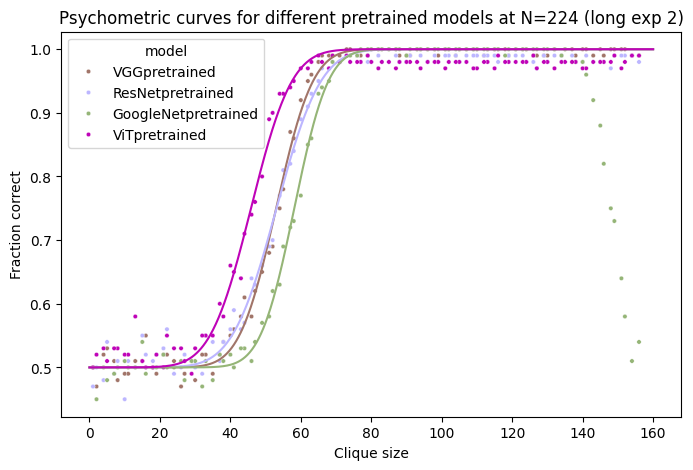

In [1045]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
pretrained_model_names = ['VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_pretrained_fraction_correct, x='clique size', y='fraction correct', hue='model', palette=my_palette_pretrained, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(pretrained_model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_pretrained_models[index][0]) / fitted_params_pretrained_models[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_pretrained[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Psychometric curves for different pretrained models at N=224 (long exp 2)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-11_long-exp', 'pretrained_models_fc_over_n_longexp_2'), dpi=300)

# Show the plot
plt.show()

In [1046]:
# adding K0 to metrics dataframe:
df_pretrained_metrics['K0'] = [fitted_params_pretrained_models[0][0], fitted_params_pretrained_models[1][0], fitted_params_pretrained_models[2][0], fitted_params_pretrained_models[3][0]]
df_pretrained_metrics

,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,model,K0
0,19070,226,28730,9574,0.988288,0.665759,0.795578,0.874746,VGGpretrained,52.992806
0,19722,870,27736,9272,0.957751,0.680210,0.795466,0.863721,ResNetpretrained,53.082630
0,16478,69,28808,12245,0.995830,0.573687,0.727988,0.849599,GoogleNetpretrained,58.138786
0,20822,1206,27792,7780,0.945251,0.727991,0.822516,0.883049,ViTpretrained,45.853823


## Comparing MLP with best CNN, scratch and pretrained models

### Metrics

In [1047]:
# merging all metrics dataframes:
df_all_metrics_longexp_2 = pd.concat([df_MLP_metrics, df_CNNs_metrics, df_scratch_metrics, df_pretrained_metrics], ignore_index=True)
df_all_metrics_longexp_2
# write K0 column in decimal notation:
df_all_metrics_longexp_2['K0'] = df_all_metrics_longexp_2['K0'].apply(lambda x: '{:.2f}'.format(x))
# rounding all values to 2 decimal places:
df_all_metrics_longexp_2 = df_all_metrics_longexp_2.round(2)
df_all_metrics_longexp_2
# putting "model" variable in first place:
cols = ['model'] + [col for col in df_all_metrics_longexp_2.columns if col != 'model']
df_all_metrics_longexp_2 = df_all_metrics_longexp_2[cols]
df_all_metrics_longexp_2

,model,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,K0
0,MLP,19741,707,27889,9263,0.97,0.68,0.80,0.87,52.43
1,CNN_small_1,16709,0,28906,11985,1.00,0.58,0.74,0.88,65.24
2,CNN_small_2,28809,28791,0,0,0.50,1.00,0.67,0.34,38639876.81
3,CNN_medium_1,28834,28766,0,0,0.50,1.00,0.67,0.69,211271093.96
4,CNN_medium_2,15911,0,28692,12997,1.00,0.55,0.71,0.81,70.43
5,CNN_large_1,17143,0,28820,11637,1.00,0.60,0.75,0.90,63.12
6,CNN_large_2,28718,28882,0,0,0.50,1.00,0.67,0.50,179.06
7,CNN_rudy,28772,28828,0,0,0.50,1.00,0.67,0.50,156.35
8,VGGscratch,28899,28701,0,0,0.50,1.00,0.67,0.50,227.02
9,ResNetscratch,17710,0,28877,11013,1.00,0.62,0.76,0.89,59.71


### Psychometric curves

In [1048]:
# merging dataframes for comparison:
df_comparison_longexp_2 = pd.concat([df_MLP, df_CNN_small_1, df_CNN_medium_2, df_CNN_large_1, df_RESNETscratch, df_GOOGLENETscratch, df_pretrained_fraction_correct])
df_comparison_longexp_2
# merging fitted parameters of best performing models for comparison:
# - CNNs: best CNN models are CNN_ksconv3_kspool3 (CNN_small_1), CNN_ksconv7_kspool2 (CNN_medium_2) and CNN_ksconv9_kspool3 (CNN_large_1) 
fitted_params_CNNs[0]
fitted_params_CNNs[3]
fitted_params_CNNs[4]   
# - scratch models: best models are ResNet and GoogleNet
fitted_params_scratch_models[1]   # ResNet
fitted_params_scratch_models[2]   # GoogleNet
# - pretrained models: all performing similarly well
fitted_params_comparison_longexp_2 = [fitted_params_MLP[0], fitted_params_CNNs[0], fitted_params_CNNs[3], fitted_params_CNNs[4], fitted_params_scratch_models[1], fitted_params_scratch_models[2], fitted_params_pretrained_models[0], fitted_params_pretrained_models[1], fitted_params_pretrained_models[2], fitted_params_pretrained_models[3]]
fitted_params_comparison_longexp_2

[array([52.4282653 , 10.48870556]),
 array([65.24131833,  5.38743704]),
 array([70.43494677,  4.84191215]),
 array([63.11952907,  3.11835636]),
 array([59.70980596,  4.4476343 ]),
 array([103.83228601,   3.75459772]),
 array([52.99280631,  8.18493089]),
 array([53.0826305 ,  9.87669729]),
 array([58.1387859 ,  7.56392795]),
 array([45.85382288,  9.1029519 ])]

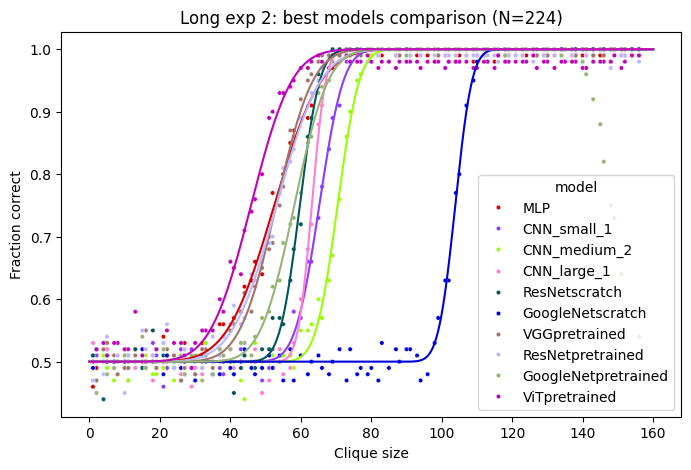

In [1049]:
# Create a larger figure with specified size
fig, ax = plt.subplots(figsize=(8, 5))

# defining model names
model_names = ['MLP', 'CNN_small_1', 'CNN_medium_2', 'CNN_large_1', 'ResNetscratch', 'GoogLeNetscratch', 'VGGpretrained', 'ResNetpretrained', 'GoogleNetpretrained', 'ViTpretrained']  

# defining x values
x_vals = np.linspace(0, 160, 1000)

# composing palette for the graph
my_palette_comparison = [my_palette_MLP, my_palette_CNN[0], my_palette_CNN[3], my_palette_CNN[4], my_palette_scratch[1], my_palette_scratch[2], my_palette_pretrained[0], my_palette_pretrained[1], my_palette_pretrained[2], my_palette_pretrained[3]]

# Scatter plot based on unique dataframe:
sns.scatterplot(data=df_comparison_longexp_2, x='clique size', y='fraction correct', hue='model', palette=my_palette_comparison, ax=ax, s=10)

# defining y values for each N value and plotting it
for index, model in enumerate(model_names):
    y_vals = (1 + ndtr((x_vals - fitted_params_comparison_longexp_2[index][0]) / fitted_params_comparison_longexp_2[index][1])) / 2
    ax.plot(x_vals, y_vals, color=my_palette_comparison[index])

# setting labels
# ax.set_xlim(ax.get_xlim()[0], 80)
# ax.set_ylim(0.2, 1.03)
ax.set_ylabel("Fraction correct")
ax.set_xlabel("Clique size")    
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_title("Long exp 2: best models comparison (N=224)")

# saving figure in folder "figures" with 300dpi
fig.savefig(os.path.join('..','results','plots','2024-07-11_long-exp', 'comparison_fc_over_n_longexp_2'), dpi=300)

# Show the plot
plt.show()

In [1050]:
# creating a dataframe with all fitted parameters for long experiment:
df_fitted_params_longexp_2 = pd.concat([df_fitted_params_MLP, df_fitted_params_CNNs, df_fitted_params_scratch_models, df_fitted_params_pretrained_models])
df_fitted_params_longexp_2
# adding experiment type variable to the dataframe:
df_fitted_params_longexp_2['experiment'] = ['long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2', 'long2']
df_fitted_params_longexp_2

,k0,delta,model,experiment
0,5.242827e+01,1.048871e+01,MLP,long2
0,6.524132e+01,5.387437e+00,CNN_small_1,long2
1,3.863988e+07,1.250380e+07,CNN_small_2,long2
2,2.112711e+08,6.694452e+07,CNN_medium_1,long2
3,7.043495e+01,4.841912e+00,CNN_medium_2,long2
4,6.311953e+01,3.118356e+00,CNN_large_1,long2
5,1.790634e+02,1.269703e+01,CNN_large_2,long2
6,1.563517e+02,2.744476e-01,CNN_rudy,long2
0,2.270168e+02,4.136374e+01,VGGscratch,long2
1,5.970981e+01,4.447634e+00,ResNetscratch,long2


-------------------------

# General comparison (short/long exp & 1st/2nd round)

## Metrics:

In [1051]:
# adding corresponding experiment type to metrics dataframe:
df_all_metrics_shortexp_1['experiment'] = 'short1'
df_all_metrics_longexp_1['experiment'] = 'long1'
df_all_metrics_shortexp_2['experiment'] = 'short2'
df_all_metrics_longexp_2['experiment'] = 'long2'

In [1052]:
df_all_metrics_comparison = pd.concat([df_all_metrics_shortexp_1, df_all_metrics_longexp_1, df_all_metrics_shortexp_2, df_all_metrics_longexp_2], ignore_index=True)
df_all_metrics_comparison

,model,TP,FP,TN,FN,precision,recall,F1,AUC_ROC,K0,experiment
0,MLP,18810,1292,27424,10074,0.94,0.65,0.77,0.85,58.47,short1
1,CNN_small_1,17140,0,28872,11588,1.00,0.60,0.75,0.88,63.01,short1
2,CNN_small_2,28852,28748,0,0,0.50,1.00,0.67,0.76,269.40,short1
3,CNN_medium_1,11909,0,28681,17010,1.00,0.41,0.58,0.89,91.69,short1
4,CNN_medium_2,28928,28672,0,0,0.50,1.00,0.67,0.50,454128506.55,short1
5,CNN_large_1,12374,0,28831,16395,1.00,0.43,0.60,0.90,88.94,short1
6,CNN_large_2,28845,28755,0,0,0.50,1.00,0.67,0.50,84485651.44,short1
7,CNN_rudy,28654,28946,0,0,0.50,1.00,0.66,0.50,555.17,short1
8,VGGpretrained,18919,280,28401,10000,0.99,0.65,0.79,0.87,54.59,short1
9,ResNetpretrained,19433,1080,27525,9562,0.95,0.67,0.79,0.86,54.33,short1


## Thresholds

In [1053]:
df_fitted_params_comparison = pd.concat([df_fitted_params_shortexp_1, df_fitted_params_longexp_1, df_fitted_params_shortexp_2, df_fitted_params_longexp_2], ignore_index=True)
df_fitted_params_comparison

,k0,delta,model,experiment
0,5.846992e+01,1.525474e+01,MLP,short1
1,6.300922e+01,4.369715e+00,CNN_small_1,short1
2,2.693958e+02,5.817469e+01,CNN_small_2,short1
3,9.168665e+01,2.310053e+00,CNN_medium_1,short1
4,4.541285e+08,1.763037e+08,CNN_medium_2,short1
5,8.894408e+01,2.886886e+00,CNN_large_1,short1
6,8.448565e+07,2.902047e+07,CNN_large_2,short1
7,5.551671e+02,4.745319e+01,CNN_rudy,short1
8,5.459194e+01,8.378613e+00,VGGpretrained,short1
9,5.433449e+01,1.105620e+01,ResNetpretrained,short1


In [1054]:
# filter out the models where the k0 value is greater than 150:
df_fitted_params_comparison_filtered = df_fitted_params_comparison[df_fitted_params_comparison['k0'] < 150]
df_fitted_params_comparison_filtered

,k0,delta,model,experiment
0,58.469916,15.254738,MLP,short1
1,63.009215,4.369715,CNN_small_1,short1
3,91.686647,2.310053,CNN_medium_1,short1
5,88.944082,2.886886,CNN_large_1,short1
8,54.591937,8.378613,VGGpretrained,short1
9,54.334492,11.056203,ResNetpretrained,short1
10,54.259777,9.777962,GoogleNetpretrained,short1
11,54.151999,8.971542,ViTpretrained,short1
12,51.556172,10.759985,MLP,long1
15,38.925520,13.328264,CNN_medium_1,long1


In [1055]:
# defining custom palette:
my_palette_comparison = {
    'MLP': my_palette_MLP,
    'CNN_small_1': my_palette_CNN[0],
    'CNN_medium_1' : my_palette_CNN[2],
    'CNN_medium_2' : my_palette_CNN[3],
    'CNN_large_1' : my_palette_CNN[4],
    'ResNetscratch': my_palette_scratch[1],
    'GoogleNetscratch': my_palette_scratch[2],
    'ViTscratch': my_palette_scratch[3],
    'VGGpretrained': my_palette_pretrained[0],
    'ResNetpretrained': my_palette_pretrained[1],
    'GoogleNetpretrained': my_palette_pretrained[2],
    'ViTpretrained': my_palette_pretrained[3]    
}

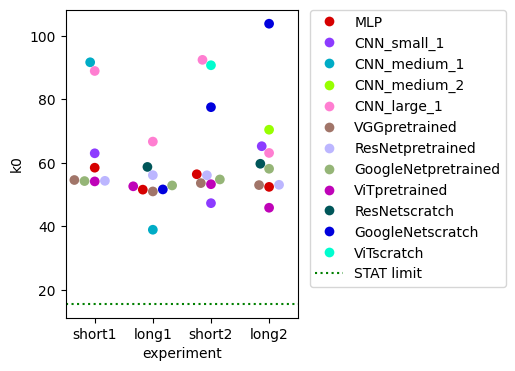

In [1056]:
# Create a larger figure
plt.figure(figsize=(3, 4))

# Use sns.swarmplot directly for a simpler approach
ax = sns.swarmplot(data=df_fitted_params_comparison_filtered, x="experiment", y="k0", hue="model", palette=my_palette_comparison, size=7)

# Draw the statistical limit line
plt.axhline(y=2*np.log2(224), color='g', linestyle=':')

# Adjust legend to include the statistical limit line
handles, labels = ax.get_legend_handles_labels()
# Append the statistical limit line handle and label
handles.append(plt.Line2D([], [], color='g', linestyle=':', label='STAT limit'))
labels.append('STAT limit')

# Move the second-to-last entry (before adding STAT limit) to the fourth position
second_to_last_handle = handles[-2]  # Get the second-to-last handle
second_to_last_label = labels[-2]    # Get the second-to-last label
# Remove the second-to-last entries
del handles[-2]
del labels[-2]
# Insert them at the fourth position
handles.insert(3, second_to_last_handle)
labels.insert(3, second_to_last_label)

# Create the legend with the adjusted handles and labels
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Saving figure
plt.savefig(os.path.join('..', 'results', 'plots', '2024-07-11_long-exp', 'short-long_exp_comparison_all.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()